<a href="https://colab.research.google.com/github/vishnux/NBA-Player-Analysis/blob/main/NBA_Player_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Evaluating NBA Players Using Physical, and Statistical Characteristics**


# **Introduction**

In this paper our group utilises National Basketball Association (NBA) players statistics based on physical and statistical characteristics to answer three guiding questions:

1. Using classification models (Logistic Regression, Classification Trees, Random Forest, Gradient Boosted Trees) can we apply NBA players weights and heights to classify players based on positions?

2. Using classification models (Logistic Regression, Classification Trees, Random Forest, Gradient Boosted Trees) can we apply NBA players in-game statistics to classify players based on positions?

3. Using PCA and K Means clustering can we find similar groups of players for each position and discover the most productive players and seasons by position?



The five positions that exist in the NBA are Point Guard (PG), Shooting Guard (SG), Small Forward (SG), Power Forward (PF) and Center (C). We will take advantage of both the statistical outputs of these players and their physical characteristics to classify players by position. Furthermore, we will then implement dimensionality reduction and k-means clustering for each position. This will help us find the players with similar play styles within the positions, and the outstanding players that are the best or most productive at those positions.

## **What was our motivation?**

In 2019 NBA teams spent over 3 billion dollars of guaranteed salary to players in the first three days of free-agency. These expensive contracts often locked a player into the team over multiple years. While the athlete is receiving significant monetary gain, the team is attempting to collect the pieces it believes are necessary to contend for an NBA championship. These expensive salaries come with significant risk to the organisation. In order to mitigate the associated dangers with paying an individual so much money it is essential to gain deeper insights into basketball positions, players, and how certain statistics and physical attributes contribute to these factors. Who are the best players in the league? Is there a lot of overlap with positions to the point that NBA positions are interchangeable? These are some of the questions that motivated this project. This deeper context and understanding can illuminate the ways that coaches and organisations can fill the positions and roles that their roster is currently lacking.

# **Methodology**


In order to take advantage of the interactive and 3D graphs that will be presented in this report, our writings and code will be detailed inside of a google colab notebook. This will also allow for seamless transitions between technical coding explanations and the more abstract graphical interpretations. Further, this section will give a brief overview of the steps that will be taken to achieve our goal in this paper.

First and foremost, the dataset and its source will be acknowledged. Then, the various wrangling and cleaning procedures that occurred will be detailed. This includes downloading, merging and altering the datasets. Once the data has been treated and organised, we review and discuss exploratory analysis to increase our knowledge and illustrate the significant details of the five positions in the NBA. Some other minor data cleaning may occur where needed.

After familiarising ourselves with the dataset we will apply a correlation matrix to the dataframe’s columns and remove values that exhibit multicollinearity. This will eliminate some of the extraneous categories from our rather large number of features.

Following these essential introductory tasks, six classification models will be tested to classify player positions based on height and weight:

1. Logistic Regression Analysis
2. Polynomial Regression Analysis
3. Support Vector Classification
4. Decision Tree
5. Random Forest Classification
6. K Nearest Neighbour Classification


The reason so many different classification methods are being used is that we are unsure which method will be the most appropriate for our data. Consequently, we will compare and contrast the best methods and results.

Once this process is complete, we will complete a similar process to classify players positions based on in-game statistical categories:

1. Logistic Regression Analysis
2. Polynomial Regression Analysis
3. Support Vector Classification
4. Decision Tree
5. Random Forest Classification
6. K Nearest Neighbour Classification


The reason that we completed separate classification techniques for the in-game statistics is because we view whether or not physical attributes are accurate at classifying players by position as a totally separate analysis. Doing these processes separately will increase our understanding of the impacts of physical attributes and individual skills on deciding positions in the NBA substantially.

Once our classification analysis is complete, we will attempt to answer the last question of our project, which is to find groups of similar players and the best individual season within each position. After separating our data into five separate dataframes (one for each position), the final two data science techniques we will employ in our paper to reach this goal are:

1. Principal Component Dimensionality Reduction
2. K-Means Clustering




## **Data Source**

We found the original data for our project from Basketball Reference (www.basketball-reference.com) which records the in-game performance and statistics of basketball players in the NBA during games. The second set of datasets we will be using comes from the NBA’s official website which records the players heights and weights for every NBA season.


## **Datasets**

For our project there were no individual datasets available that met the requirements for our project. However, there were a series of individual datasets that could be combined and transformed to be sufficient. We desired a dataset containing individual NBA player statistics over a ten year span. Some of the major statistics necessary for this research were (but not limited to) points per game, assists per game, rebounds per game and various other figures regarding scoring efficiency such as true-shooting percentage. Finally, there needed to be basic physical attributes available for each player such as height and weight.

The first dataset we discovered came from Basketball Reference and listed every player's position and their stats for an individual season in the forms of totals. For example, instead of points per game, it had ‘total points’ accumulated over the season. Overall, each of these individual datasets contained anywhere from 300-500 rows (depending on how many players played that season) along with 31 columns. In excel we added a year column to indicate which season the dataset represented. Once this initial process was completed, we individually downloaded each of these datasets from the years 2010 to 2019 (which is 10 seasons) and uploaded them into google colab.   

One of the initial issues we discovered was that within the same season there existed duplicate players, because some players were traded midseason. To simplify our data we sorted each dataset by ‘games played’ and removed duplicates of the same player. In the arguments of the drop duplicates function we indicated to keep the first of the duplicate pair that showed up, which coupled with our sorting guaranteed we kept the row that the traded individual played the most.

Next, we merged the 10 datasets into one large dataframe with around 5000 rows and 31 columns. However, this data still lacked a lot of our required information as it lacked per game numbers and physical characteristic information. To solve the first issue, we simply divided each relevant statistic by total games and stored it in a newly created column. For example, total points was divided by total games in a new column labelled ‘PTS/G’.

The second issue was a lot more complicated and required the introduction of a second group of datasets. We discovered on the NBA’s official website a list of ‘player bios’ where (among other information) the weights and heights of players were included for each season. Similar to the original dataset we individually downloaded the seasons from 2009 to 2019, added year columns and then merged these into a single dataframe. Finally, once all of this data collection and preparation was complete a left join based on the ‘Player’ column was conducted to only add data where players names are already available to our original dataframe. Our final dataframe contains 4006 rows and 49 columns.


In [ ]:
%pip install icecream

In [ ]:
#@title imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from icecream import ic
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import string
from sklearn.metrics import confusion_matrix
import nltk
from sklearn.decomposition import PCA
import icecream as ic
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from icecream import ic
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from icecream import ic
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import string
from sklearn.metrics import confusion_matrix
import nltk
from sklearn.decomposition import PCA
import icecream as ic
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
import sklearn.cluster as skc
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from icecream import ic
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier
#from matplotlib.pyplot import feature_importances_
from sklearn import pipeline
#!pip install matplotlib-feature_importances_
from sklearn.inspection import permutation_importance
import seaborn as sns


In [ ]:
dfNBA = pd.read_csv("Combined_HW_Revised.csv")


In [ ]:
dfNBA.drop('Unnamed: 0',  axis=1, inplace=True)

In [ ]:
len(dfNBA)

4006

In [ ]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_



In [ ]:
def remove_perc(a):
  a=a[:-1]
  a=float(a)
  return a


In [ ]:
dfNBA.columns

Index(['Rk', 'PLAYER', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG%', '3P%',
       '2P%', 'eFG%', 'FT%', 'PF', 'Year', 'FG/G', '3P/G', '3PA/G', '2P/G',
       '2PA/G', 'FT/G', 'ORB/G', 'DRB/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G',
       'TOV/G', 'PTS/G', 'FTA/G', 'TEAM', 'AGE', 'HEIGHT', 'WEIGHT', 'COLLEGE',
       'COUNTRY', 'DRAFT YEAR', 'DRAFT ROUND', 'DRAFT NUMBER', 'GP', 'PTS',
       'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%'],
      dtype='object')

In [ ]:
dfNBA.rename(columns={"3P%": "three_pt_pct",'2P%': "two_pt_pct"},inplace=True)

In [ ]:
dfNBA.rename(columns={"OREB%": "OREB_pct",'DREB%': "DREB_pct", 'USG%': "USG_pct",'TS%': "TS_pct",'AST%': "AST_pct"},inplace=True)

In [ ]:
l=dfNBA.columns

In [ ]:
l=list(l)

In [ ]:
l.remove("WEIGHT")


In [ ]:
l.remove("HEIGHT")

In [ ]:
dfNBA.dropna(subset = l,inplace=True)

In [ ]:
dfNBA

,Rk,PLAYER,Pos,Age,Tm,G,GS,MP,FG%,three_pt_pct,...,GP,PTS,REB,AST,NETRTG,OREB_pct,DREB_pct,USG_pct,TS_pct,AST_pct
0,389,Ramon Sessions,PG,27,TOT,83,19,2214,0.429,0.282,...,61.0,14.4,2.8,3.8,-12.0,1.50%,8.70%,24.70%,52.90%,26.60%
1,222,Jarrett Jack,SG-PG,27,TOT,83,15,1722,0.408,0.306,...,82.0,11.4,2.7,5.0,-2.8,1.40%,8.80%,18.50%,59.90%,27.70%
3,312,Greg Monroe,PF,23,DET,82,82,2690,0.497,0.000,...,81.0,16.0,9.6,3.5,-5.2,8.90%,21.20%,24.40%,52.70%,18.90%
4,165,Taj Gibson,PF,28,CHI,82,8,2351,0.479,0.000,...,65.0,8.0,5.3,0.9,5.3,8.60%,15.20%,17.70%,51.80%,7.10%
5,379,Ricky Rubio,PG,23,MIN,82,82,2638,0.381,0.331,...,57.0,10.7,4.0,7.3,-1.8,2.60%,12.10%,21.20%,48.20%,39.10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,217,Jarrett Jack,PG,33,NOP,2,0,33,0.667,0.000,...,2.0,3.0,0.0,2.5,-10.1,0.00%,0.00%,8.90%,77.30%,26.30%
3967,235,Dahntay Jones,SF,36,CLE,1,0,12,0.375,0.000,...,1.0,9.0,2.0,1.0,15.5,6.70%,7.70%,41.70%,46.10%,20.00%
3980,244,Aaron Jackson,PG,31,HOU,1,0,35,0.333,0.250,...,1.0,8.0,3.0,1.0,-19.8,5.60%,3.10%,14.90%,40.50%,5.30%
3986,299,Jeremy Lin,PG,29,BRK,1,1,25,0.417,0.500,...,1.0,18.0,0.0,4.0,-9.5,0.00%,0.00%,25.40%,59.70%,23.50%


## **Metadata**

In this section the variables essential to our research will be highlighted along with whether the variable is continuous or discrete. Due to our large number of independent variables (20 in total) we are breaking them up into subsections.

Dependent Variable:

NBA Positions - Dummy variable representing the position of an NBA player (Type: Discrete)

*   PG: Point Guard
*   SG: Shooting Guard
*   SF: Small Forward
* PF: Power Forward
*   C: Center


Physical characteristic Independent Variables (2 total):
*   Weight - The weight of a player in lbs (Type: Continuous)
*   Height - the height of a player in inches (Type: Continuous)

Per-Game, Independent Variables (12 total):

* G - The number of games the player played that season
* PTS/G - Total points scored in a season divided by total games played (Type: Continuous)
* AST/G - Total number assists in a season divided by total games played (Type: Continuous)
* DRB/G - Total number of defensive rebounds in a season divided by total games played  (Type: Continuous)
* ORB/G - Total number of offensive rebounds in a season divided by total games played  (Type: Continuous)
* TRB/G - Total number of rebounds in a season divided by total games played  (Type: Continuous)
* STL/G  - Total number of steals in a season divided by total games played (Type: Continuous)
* 2P/G - Total number of two-point shots made divided by total games played (Type: Continus)
* 2PA/G - Total number of two-point shots attempted divided by total games played (Type: Continuous)
* 3P/G - Total number of three-point shots made divided by total games played (Type: Continuous)
* 3PA/G - Total number of three-point shots attempted divided by total games played (Type: Continuous)
* PF/A - Total personal fouls committed divided by total games played (Type: Continuous)


Percentage-based Independent variables (6 total):
* TS% - True Shooting Percentage; the formula is PTS / (2 *FGA + 0.44 * FTA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws (Type: Discrete)
* eFG%  -  Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal
* 2P% - Two Point Percentage: the formula is 2P/2PA. Represents the percentage of two-point shots made
* 3P% - Three Point Percentage: the formula is 3P/3PA. Represents the percentage of three-point shots made
* FT% - Free Throw Percentage: the formula is FT/FTA. Represents the percentage of free-throw shots made




## **Data cleaning and wrangling steps:**

Cleaning for combination of the datasets:

* Dropped duplicate players for each year
  *  This happened if a player got traded to another team in a certain year, so there were two duplicate rows for a player but under two different teams
  *  We decided to keep the version for the team which the player played the most in that year

Cleaning After Dataset Combine:
* Drop NA’s
* Changed height format
  * Originally the format for height was in the format of “7-0”(representing 7 feet and 0 inches). The problem with this was it caused the height column to be a string. This needed to be changed into a float format. So we created a function that would convert feet into inches so player heights could be used in our models
* Took out % symbol from columns where it was present as it caused these columns to be recognized as strings instead of floats
* Renamed some columns with % in the names as using these columns in some functions was not possible due to their names
* Replaced secondary positions with only primary as the primary position is most important, and makes analysis simpler



In [ ]:
heights = []
for i in dfNBA['HEIGHT']:
  i = parse_ht(i)
  heights.append(i)

In [ ]:
dfNBA['OREB_pct']= dfNBA.apply(lambda row: remove_perc(row.OREB_pct), axis=1)
dfNBA["DREB_pct"]= dfNBA.apply(lambda row: remove_perc(row.DREB_pct), axis=1)
dfNBA["USG_pct"]= dfNBA.apply(lambda row: remove_perc(row.USG_pct), axis=1)
dfNBA["TS_pct"]= dfNBA.apply(lambda row: remove_perc(row.TS_pct), axis=1)
dfNBA["AST_pct"]= dfNBA.apply(lambda row: remove_perc(row.AST_pct), axis=1)

In [ ]:
dfNBA = dfNBA.drop(['HEIGHT'], axis = 1)
dfNBA["Height"] = heights

In [ ]:
dropNANBA = dfNBA
dropNANBA

,Rk,PLAYER,Pos,Age,Tm,G,GS,MP,FG%,three_pt_pct,...,PTS,REB,AST,NETRTG,OREB_pct,DREB_pct,USG_pct,TS_pct,AST_pct,Height
0,389,Ramon Sessions,PG,27,TOT,83,19,2214,0.429,0.282,...,14.4,2.8,3.8,-12.0,1.5,8.7,24.7,52.9,26.6,75.0
1,222,Jarrett Jack,SG-PG,27,TOT,83,15,1722,0.408,0.306,...,11.4,2.7,5.0,-2.8,1.4,8.8,18.5,59.9,27.7,75.0
3,312,Greg Monroe,PF,23,DET,82,82,2690,0.497,0.000,...,16.0,9.6,3.5,-5.2,8.9,21.2,24.4,52.7,18.9,83.0
4,165,Taj Gibson,PF,28,CHI,82,8,2351,0.479,0.000,...,8.0,5.3,0.9,5.3,8.6,15.2,17.7,51.8,7.1,81.0
5,379,Ricky Rubio,PG,23,MIN,82,82,2638,0.381,0.331,...,10.7,4.0,7.3,-1.8,2.6,12.1,21.2,48.2,39.1,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,217,Jarrett Jack,PG,33,NOP,2,0,33,0.667,0.000,...,3.0,0.0,2.5,-10.1,0.0,0.0,8.9,77.3,26.3,75.0
3967,235,Dahntay Jones,SF,36,CLE,1,0,12,0.375,0.000,...,9.0,2.0,1.0,15.5,6.7,7.7,41.7,46.1,20.0,78.0
3980,244,Aaron Jackson,PG,31,HOU,1,0,35,0.333,0.250,...,8.0,3.0,1.0,-19.8,5.6,3.1,14.9,40.5,5.3,75.0
3986,299,Jeremy Lin,PG,29,BRK,1,1,25,0.417,0.500,...,18.0,0.0,4.0,-9.5,0.0,0.0,25.4,59.7,23.5,75.0


In [ ]:
dropNANBA = dropNANBA.replace("C-PF","C")
dropNANBA = dropNANBA.replace("PF-C", "PF")
dropNANBA = dropNANBA.replace("SF-SG","SF")
dropNANBA = dropNANBA.replace("SG-SF","SG")
dropNANBA = dropNANBA.replace("PG-SG","PG")
dropNANBA = dropNANBA.replace("SG-PG","PG")
dropNANBA = dropNANBA.replace("PF-SF","PF")
dropNANBA = dropNANBA.replace("SF-PF","SF")
dropNANBA = dropNANBA.replace("SG-PF","SG")

In [ ]:
dropNANBA.loc[:, 'Pos'].value_counts()


SG    656
PG    592
SF    580
PF    572
C     419
Name: Pos, dtype: int64

In [ ]:
df = dropNANBA
df

,Rk,PLAYER,Pos,Age,Tm,G,GS,MP,FG%,three_pt_pct,...,PTS,REB,AST,NETRTG,OREB_pct,DREB_pct,USG_pct,TS_pct,AST_pct,Height
0,389,Ramon Sessions,PG,27,TOT,83,19,2214,0.429,0.282,...,14.4,2.8,3.8,-12.0,1.5,8.7,24.7,52.9,26.6,75.0
1,222,Jarrett Jack,PG,27,TOT,83,15,1722,0.408,0.306,...,11.4,2.7,5.0,-2.8,1.4,8.8,18.5,59.9,27.7,75.0
3,312,Greg Monroe,PF,23,DET,82,82,2690,0.497,0.000,...,16.0,9.6,3.5,-5.2,8.9,21.2,24.4,52.7,18.9,83.0
4,165,Taj Gibson,PF,28,CHI,82,8,2351,0.479,0.000,...,8.0,5.3,0.9,5.3,8.6,15.2,17.7,51.8,7.1,81.0
5,379,Ricky Rubio,PG,23,MIN,82,82,2638,0.381,0.331,...,10.7,4.0,7.3,-1.8,2.6,12.1,21.2,48.2,39.1,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,217,Jarrett Jack,PG,33,NOP,2,0,33,0.667,0.000,...,3.0,0.0,2.5,-10.1,0.0,0.0,8.9,77.3,26.3,75.0
3967,235,Dahntay Jones,SF,36,CLE,1,0,12,0.375,0.000,...,9.0,2.0,1.0,15.5,6.7,7.7,41.7,46.1,20.0,78.0
3980,244,Aaron Jackson,PG,31,HOU,1,0,35,0.333,0.250,...,8.0,3.0,1.0,-19.8,5.6,3.1,14.9,40.5,5.3,75.0
3986,299,Jeremy Lin,PG,29,BRK,1,1,25,0.417,0.500,...,18.0,0.0,4.0,-9.5,0.0,0.0,25.4,59.7,23.5,75.0


In [ ]:
df.drop(["AGE","GP"],axis=1, inplace=True)

In [ ]:
df[df["PLAYER"]=="Patty Mills"]["Year"]

59      2019
159     2018
202     2016
208     2015
310     2013
363     2017
1683    2010
2049    2012
2400    2014
3476    2011
Name: Year, dtype: int64

## **Exploratory Analysis**

For our exploratory analysis we initially wanted to group by position and see a
summary of the mean of stats and physical characteristics. We used visualizations to explore and gain further insights into what statistics and characteristics make up each position, as well as created a seaborn plot to see the distributions and how each statistic was correlated with one another.


In [ ]:
summary_df = df.groupby('Pos').mean()
summary_df=summary_df.reindex(["PG", "SG", "SF",'PF',"C"])
summary_df[['PTS/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G','eFG%', 'three_pt_pct','two_pt_pct','NETRTG', 'OREB_pct', 'DREB_pct', 'USG_pct', 'TS_pct','AST_pct','Height', 'WEIGHT']]

,PTS/G,TRB/G,AST/G,STL/G,BLK/G,eFG%,three_pt_pct,two_pt_pct,NETRTG,OREB_pct,DREB_pct,USG_pct,TS_pct,AST_pct,Height,WEIGHT
Pos,,,,,,,,,,,,,,,,
PG,9.534405,2.472058,3.837090,0.866408,0.176395,0.476569,0.331025,0.456821,-1.002872,1.941723,8.804899,19.851182,51.452196,25.741385,74.150338,188.677365
SG,9.752946,2.646503,1.959667,0.742727,0.231538,0.484671,0.340611,0.456721,-1.155335,2.171494,9.492226,19.097104,52.360976,13.222713,76.937500,205.368902
SF,9.067984,3.595147,1.624522,0.752289,0.362055,0.494800,0.328205,0.480771,-0.344483,3.353103,12.317069,17.516034,52.982931,10.311034,79.655172,219.820690
PF,9.211446,5.016637,1.392431,0.591549,0.556987,0.499663,0.262925,0.496260,-1.511538,6.409790,16.619056,18.655245,53.373077,9.299825,81.349650,238.428322
C,9.150362,6.191058,1.331764,0.570877,0.962200,0.523754,0.185036,0.527931,-0.852267,8.800716,19.221957,18.277327,55.304296,9.017422,83.078759,251.226730


Text(0.5, 0, 'Position')

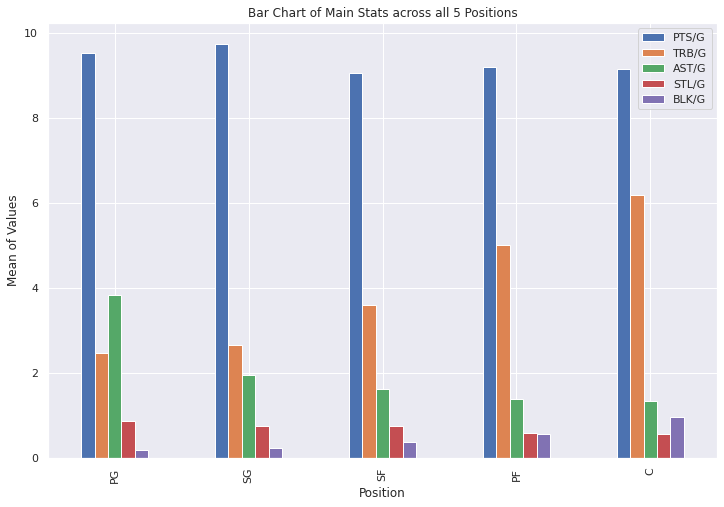

In [ ]:
bar_chart_df = summary_df[['PTS/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G']]
bar_chart_df.plot(kind='bar', figsize = (12, 8), title='Bar Chart of Main Stats across all 5 Positions')
plt.ylabel("Mean of Values")
plt.xlabel("Position")

From the bar chart we can see that C (Center) has the highest rebounds and excel at blocking. It should be noted that C are the tallest and weigh the most which explains why their role on the court is to block shots and dunk resulting in not handling the ball very much. PF (Power Forward) excels at rebounds. C and PF are generally good at defence. PG (Point Guard) excel at assists and steals. PG has the lowest height and weight of all the positions because they generally are the most coordinated, better control of their limbs and good at controlling the ball in the offence which makes them the best dribblers and ball handlers. SG (Shooting Guard) and SF (Small Forward) are both well rounded positions. SF appears to be a slightly more defensive position than SG, with more rebounds and blocks. SF average height and weight lies around the middle in comparison to the other positions, which is possibly another factor of why they are a well rounded position. Points are evenly distributed among all the positions with SG having the highest amount of points

Text(0.5, 0, 'Position')

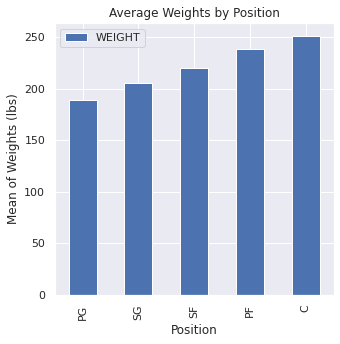

In [ ]:
bar_chart_df = summary_df[['WEIGHT']]
bar_chart_df.plot(kind='bar', figsize = (5,5), title='Average Weights by Position')
plt.ylabel("Mean of Weights (lbs)")
plt.xlabel("Position")

Text(0.5, 0, 'Position')

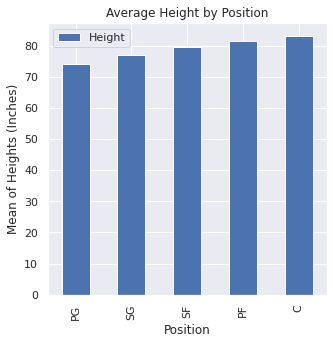

In [ ]:
bar_chart_df = summary_df[['Height']]
bar_chart_df.plot(kind='bar', figsize = (5, 5), title='Average Height by Position')
plt.ylabel("Mean of Heights (Inches)")
plt.xlabel("Position")

Text(0.5, 0, 'Position')

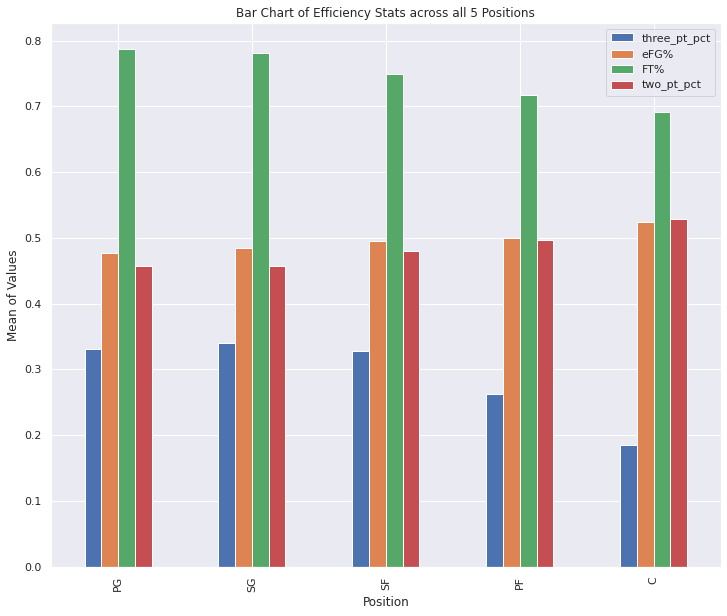

In [ ]:
shooting_percentage_chart = summary_df[['three_pt_pct', 'eFG%', 'FT%','two_pt_pct']]
shooting_percentage_chart.plot(kind='bar', figsize = (12, 10), title='Bar Chart of Efficiency Stats across all 5 Positions')
plt.ylabel("Mean of Values")
plt.xlabel("Position")

From the bar chart above we can conclude that the maximum number of “Free Throw percentage” (FT%) is taken from the Point Guard (PG) position with the minimum number observed from the Center (C). Also, we can see that the Centre position  (C) has the minimum “three pointers” made, but the maximum “Effective field goal percentage” (eFG%) and “Two point percentage” (two_pt_pct) among all the positions. The highest efficiency of Center position  (C) could be explained by the fact that Center players more often dunk rather than shoot the ball, which is a lot more efficient and easy to make. Thus, the shots from Center position  (C) are more accurate, which improves their “Effective field goal percentage” (eFG%). The least “Effective field goal percentage” (eFG%) and “Two point percentage” (two_pt_pct) are observed in the Point Guard (PG) and Shooting Guard (SG) positions.



## **Seaborn Pair Plot**


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



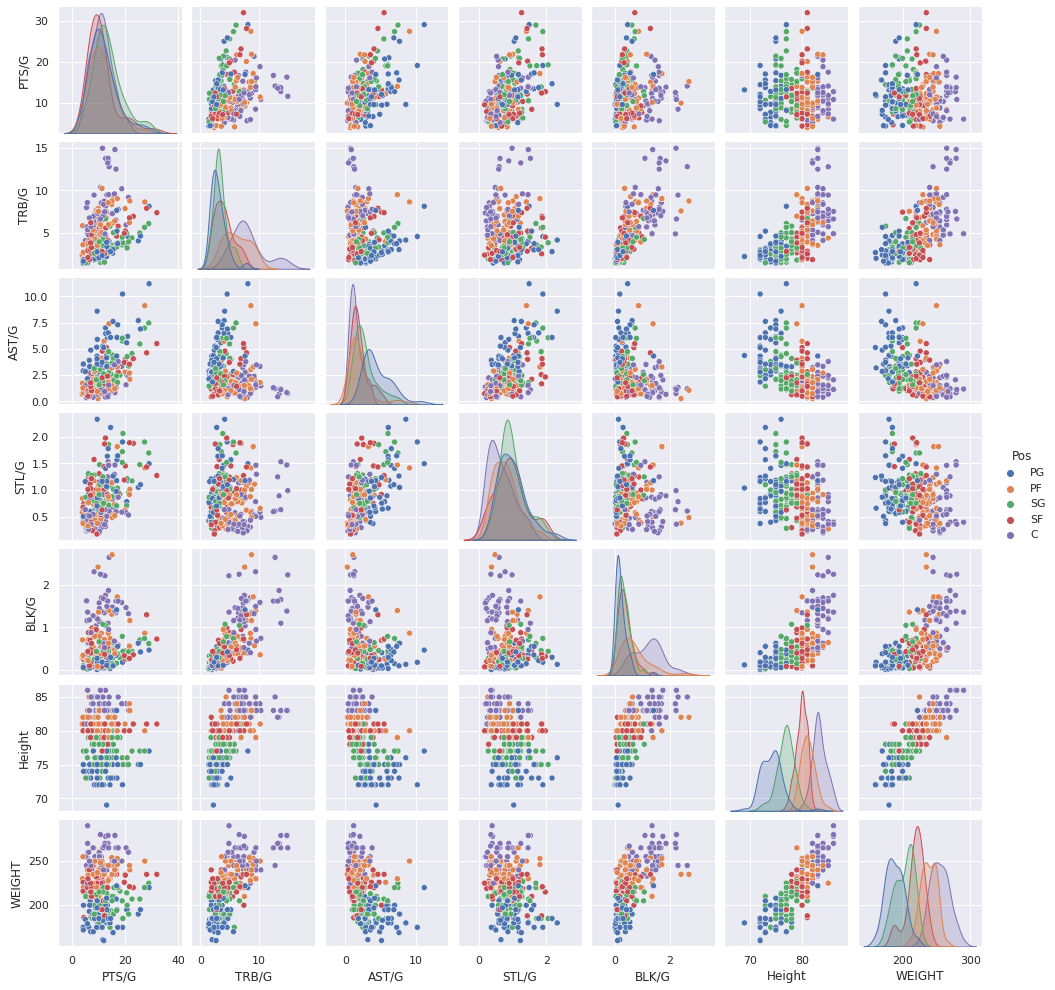

In [ ]:
#Seaborn Plot
import seaborn as sns
sns_df = df[['PTS/G', 'TRB/G', 'AST/G', 'STL/G', 'BLK/G', 'Height', 'WEIGHT','Pos']].head(300)
sns_df = sns_df.reset_index()
sns_df = sns_df.drop('index', axis=1)
sns_plot = sns.pairplot(sns_df, hue='Pos', size=2)
sns_plot

The seaborn pair plot shows us scatter plots of all possible x/y-axis combinations, the colours represent the different players positions. Diagonally we see the distributions for each stat, for example the points stat has similar distributions for all positions, however defensive stats such as blocks and rebounds, we see a distribution that is higher for Centers which is a defensive position.

Overall we see that most statistics have positive correlations, however when comparing offensive stats like assists and steals to defensive stats like blocks and rebounds we see no correlation. We can see where certain positions really shine, such as Centers and their representation in the block and rebound chart. Or for Point Guards and their representation in the assist and teal charts.

We also see that There is a positive correlation between the physical characteristics of a player, which is expected, taller players tend to be heavier. The distributions for physical characteristics also match up with what we would expect for each position, Centers are the tallest and heaviest, Point Guards are the shortest and not as heavy. Height and weight both have a very positive correlation with blocking, and rebounds.


In [ ]:
df.columns

Index(['Rk', 'PLAYER', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG%',
       'three_pt_pct', 'two_pt_pct', 'eFG%', 'FT%', 'PF', 'Year', 'FG/G',
       '3P/G', '3PA/G', '2P/G', '2PA/G', 'FT/G', 'ORB/G', 'DRB/G', 'TRB/G',
       'AST/G', 'STL/G', 'BLK/G', 'TOV/G', 'PTS/G', 'FTA/G', 'TEAM', 'WEIGHT',
       'COLLEGE', 'COUNTRY', 'DRAFT YEAR', 'DRAFT ROUND', 'DRAFT NUMBER',
       'PTS', 'REB', 'AST', 'NETRTG', 'OREB_pct', 'DREB_pct', 'USG_pct',
       'TS_pct', 'AST_pct', 'Height'],
      dtype='object')

In [ ]:
positions=df["Pos"].unique()

In [ ]:
df.drop('Rk',  axis=1, inplace=True)

In [ ]:
String_columns = df[["Pos","Year", 'Age', 'PLAYER','Tm','TEAM','COLLEGE','COUNTRY','DRAFT YEAR','DRAFT ROUND','DRAFT NUMBER']]


Text(245.59375, 0.5, 'Player traits')

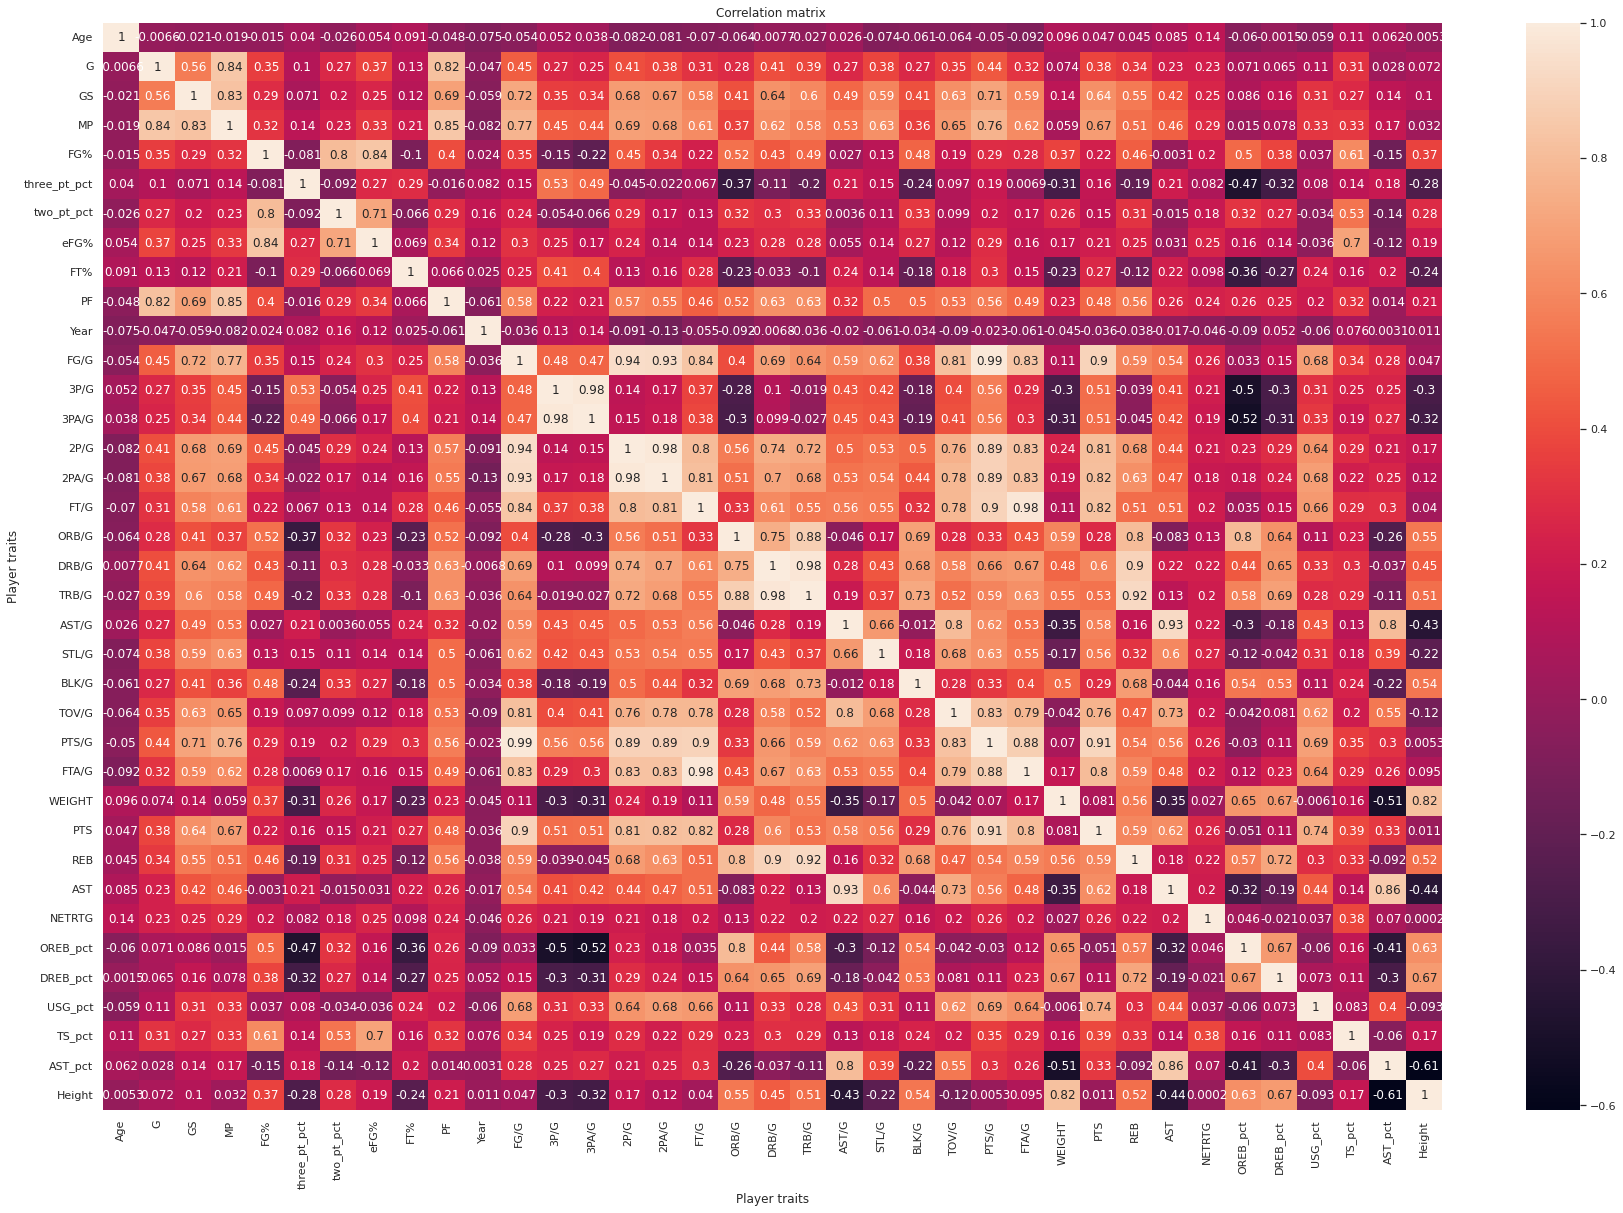

In [ ]:
correlation_mat = df.corr()

plt.rcParams['figure.figsize'] = (30, 20)

sns.heatmap(correlation_mat, annot = True )

plt.title("Correlation matrix ")

plt.xlabel("Player traits")

plt.ylabel("Player traits")


In [ ]:
More_removal=["FG%","FG/G","3PA/G","GS","MP","2PA/G","FTA/G",	"PTS"	,"REB",	"AST","OREB_pct","DREB_pct", "PTS/G", "FT/G","TRB/G","USG_pct","AST_pct"]
df=df.drop(More_removal,axis=1)

Text(245.59375, 0.5, 'Player traits')

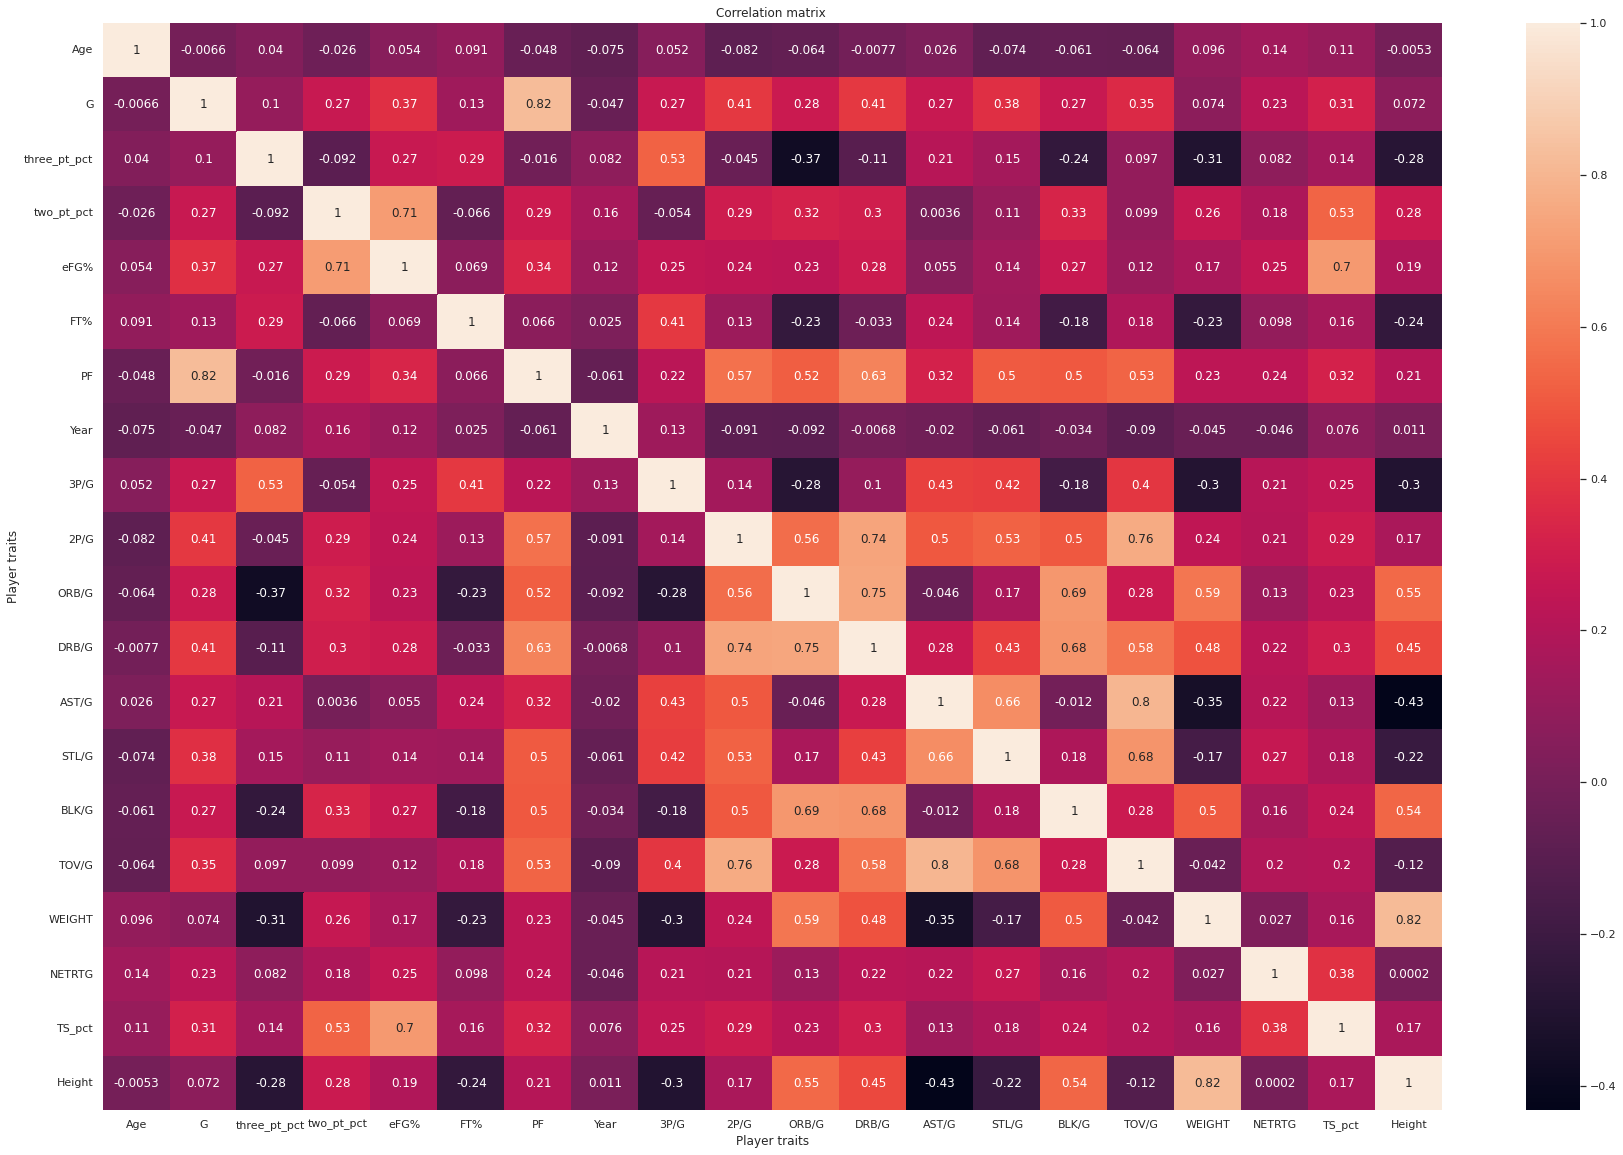

In [ ]:
correlation_mat = df.corr()

plt.rcParams['figure.figsize'] = (30, 20)

sns.heatmap(correlation_mat, annot = True )

plt.title("Correlation matrix ")

plt.xlabel("Player traits")

plt.ylabel("Player traits")

**Correlation matrix to see which features in dataset are highly correlated**

* Drop features that have correlation scores above 0.8 and had high correlation with multiple features
* We ended up with traits that had lower correlation coefficients
* We included one trait PF (Personal Fouls) as we hypothesised that Centers as a defensive position which would have the most fouls (the results did not show this to be true)

In [ ]:
post_dict = {'PG': 0, 'PF':1, 'SG':2, 'SF':3, 'C' : 4}


In [ ]:
def make_decision_regions(x=None, y=None, model=None):
    X, Y = np.meshgrid(x, y)
    XY = np.array([X.ravel(), Y.ravel()]).T
    assert XY.shape == (len(x)*len(y), 2)
    Z = model.predict(XY).reshape(X.shape)
    return X, Y, Z

In [ ]:
df=df.reset_index()
df.drop("index",axis=1,inplace=True)

In [ ]:
df.to_csv("dfaftercleaning.csv")

# **Question 1**

*Using classification models (Logistic Regression, Classification Trees, Random Forest, Gradient Boosted Trees) can we apply NBA players weights and heights to classify players based on positions?*

In [ ]:
df = pd.read_csv("dfaftercleaning.csv")

In [ ]:
sum(df["WEIGHT"].isnull())
df_physical=df.drop_duplicates(subset ="PLAYER",keep = "first")

In [ ]:
#df_physical.drop("Unnamed: 0",inplace=True,axis=1)
positions=df_physical["Pos"].unique()
df_physical['Position'] = df_physical.apply(lambda row: post_dict[row.Pos], axis=1)
#df_physical.groupby('Position').count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y=df_physical["Position"]
y=y.to_numpy()
X= df_physical[["Height","WEIGHT"]]
train_columns= X.columns
X=X.to_numpy()
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

**Logistic Regression**

The probability for classification problems with two possible outcomes is modelled using logistic regression. The logistic function is used in a logistic regression model to compress the output of a linear equation between 0 and 1. It is used to predict the likelihood of a categorical dependent variable. The dependent variable in logistic regression is a binary variable that comprises data coded as 1 and 0. In other words, as a function of X, the logistic regression model predicts P(Y=1).

Stratified sampling is used since there is an imbalance in classes and the preferred scoring metric is accuracy.


In [ ]:
U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr,random_state=42)
model = LogisticRegression(max_iter=10000)
model.fit(U_tr, v_tr)
y_pred = model.predict(U_val)
acc = accuracy_score(v_val, y_pred)
print(acc)

0.7565217391304347


The accuracy on validation set with Logistic Regression with one degree is 75.65%. Now, we want to try if we can increase the accuracy with Polynomial Features.

**Polynomial Regression**

Polynomial regression is a type of linear regression in which the data is fitted with a polynomial equation that has a curved relationship between the target and independent variables. We use the sklearn PolynomialFeatures function to convert our data into a polynomial, and then use linear regression to fit the parameters.


In [ ]:
degrees = np.arange(1,5)

n_repeats = 100
accs_val = np.zeros((n_repeats, len(degrees)))

for i in range(n_repeats):
  U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr, random_state= 2)
  for j, degree in enumerate(degrees):
      model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=degree), LogisticRegression(max_iter=1000000))
      model.fit(U_tr, v_tr)
      accs_val[i, j] = accuracy_score(v_val, model.predict(U_val))

scores = accs_val.mean(axis=0)
degree = degrees[np.argmax(scores)]
#print(degrees)


In [ ]:
ic(scores)

ic| scores: array([0.74782609, 0.73913043, 0.72173913, 0.73043478])


array([0.74782609, 0.73913043, 0.72173913, 0.73043478])

There wasn’t an increase in accuracy scores after increasing the degrees. So the underlying distribution is probably not polynomial.


In [ ]:
model = LogisticRegression(max_iter=1000000)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)
acc = accuracy_score(y_te, y_pred)
ic(acc)

ic| acc: 0.6736111111111112


0.6736111111111112

So, the logistic regression accuracy on test set is 67.36%

In [ ]:
dataframe_logistic=pd.DataFrame(model.coef_, columns=train_columns)
post_dict_reverse = {4:"C", 1:'PF',  0:'PG',  3:'SF', 2:'SG'}
dataframe_logistic=dataframe_logistic.reset_index()
dataframe_logistic.rename(columns = {'index':'position'}, inplace = True)
dataframe_logistic['position'] = dataframe_logistic.apply(lambda row: post_dict_reverse[row.position], axis=1)
dataframe_logistic.set_index("position")

,Height,WEIGHT
position,,
PG,-1.976565,-0.157899
PF,1.189430,0.093654
SG,-1.267760,-0.079965
SF,0.053500,-0.005658
C,2.001391,0.149867


From this we can say that centers are tallest and are heavier than others, while Point Guards are the shortest and weigh least.

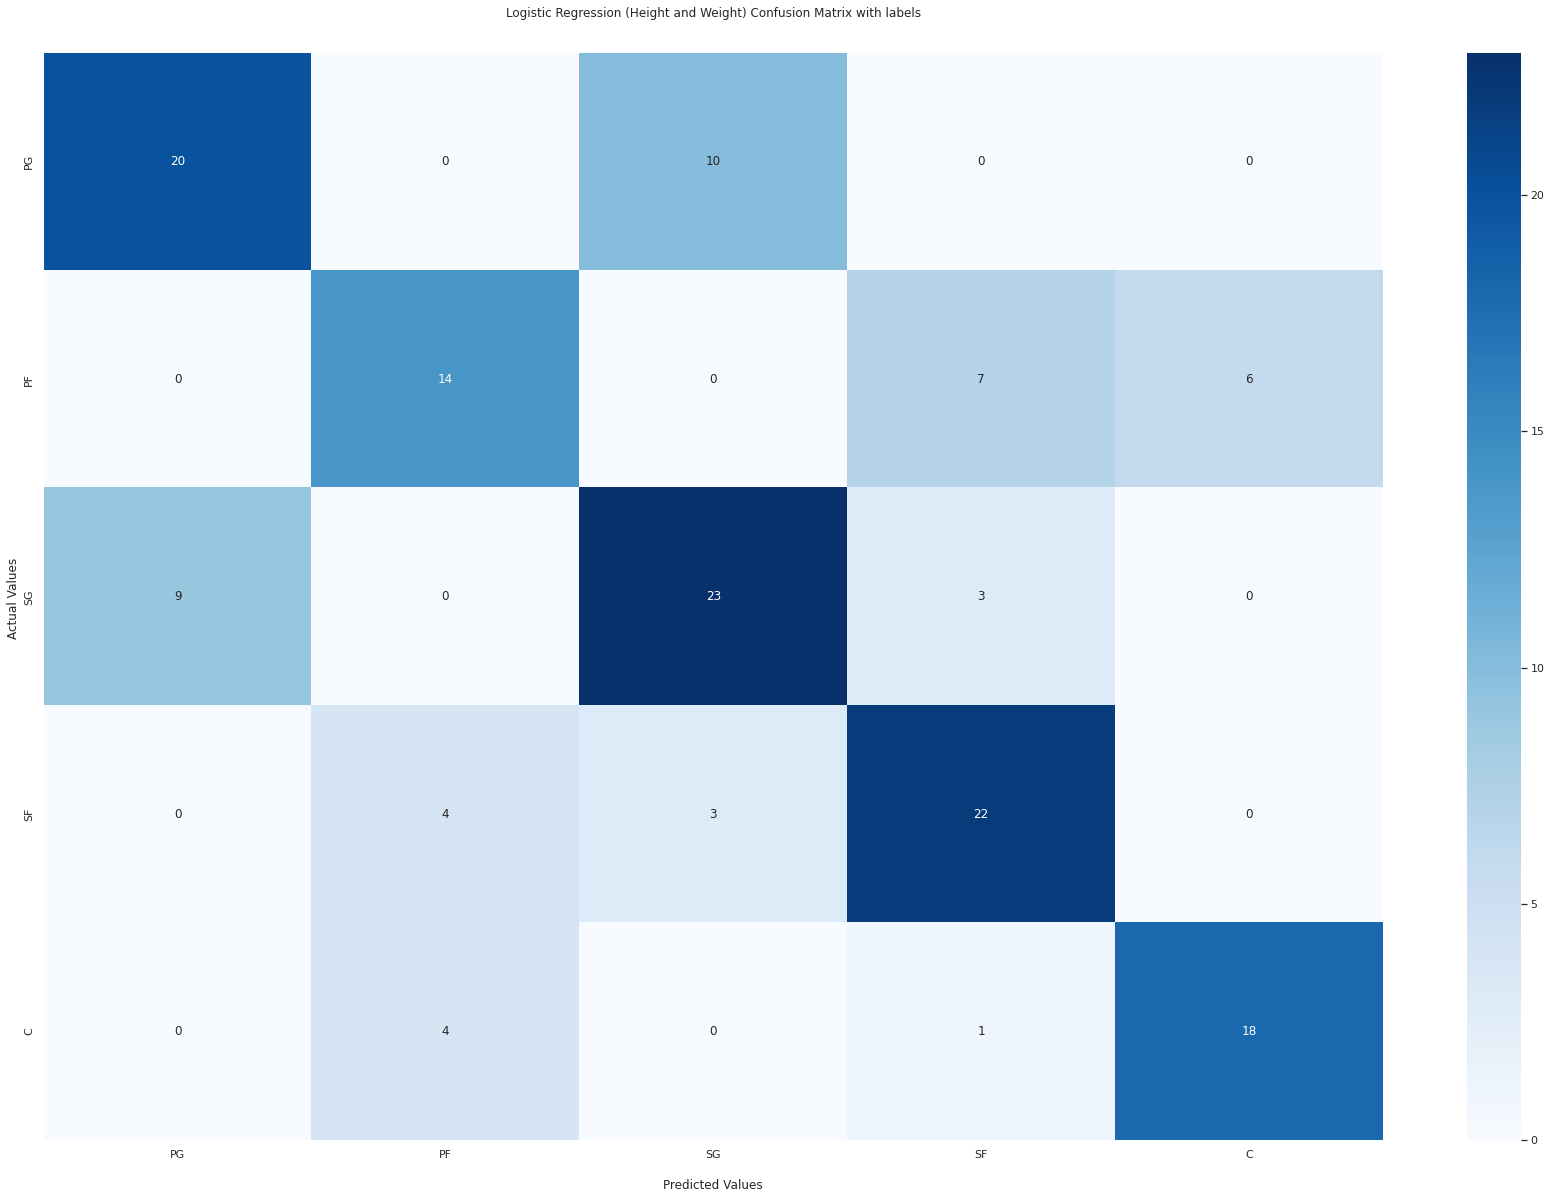

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Logistic Regression (Height and Weight) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
#sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

The confusion matrix is a helpful way to visualise the model’s accuracy. The correctly classified positions are on the left diagonal. We can see in the matrix, for instance, that out of the 30 Point Guards included in the Testing Dataset which is the sum of columns of the first row, the model correctly predicted Point Guard 20 times. 10 times it thought the Point Guard was a Shooting Guard. It never thought the Point Guard was a Power Forward, and it never thought the Point Guard was a Center. That distribution makes sense — as the differing responsibilities of the positions increased, the model was less likely to predict that the Point Guard was in that position. The model finds it difficult to classify Power Forwards which is the second row and misclassified it 7 times as Small forward and 6 times as Center. The model predicts the Center class which is the fifth row the best with only 5 instances of misclassification.

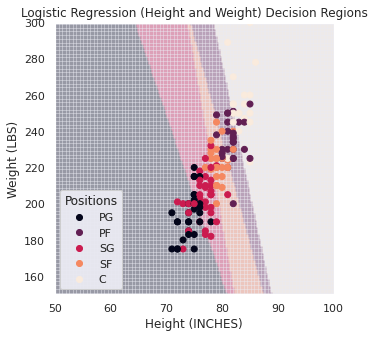

In [ ]:
U, V, W = make_decision_regions(x=np.linspace(50,100, 200), y=np.linspace(150, 300, 200), model=model)
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.pcolormesh(U, V, W, shading="auto", alpha=0.1)
classes= list(dataframe_logistic['position'])
scatter=ax.scatter(*X_te.T, c=y_te)

legend1 = ax.legend(handles=scatter.legend_elements()[0],
                    loc="lower left", title="Positions",labels=classes)
ax.add_artist(legend1)
plt.title("Logistic Regression (Height and Weight) Decision Regions")
plt.xlabel("Height (INCHES)")
plt.ylabel("Weight (LBS)")
plt.show()
plt.show()

**Support Vector Classifier**

GridSearchCV is the process of determining the ideal values for a particular model by doing hyper-parameter tweaking. It goes through all of the numerous parameters that are supplied into the parameter grid and finds the best combination of parameters depending on your preferred scoring metric (accuracy, f1, etc). GridSearchCV's "best" parameters are theoretically the best that could be produced, but only by the parameters that you included in your parameter grid.


In [ ]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kernel = ["linear", "poly", "rbf", "sigmoid"]
search = GridSearchCV(SVC(), {"C": C, "kernel": kernel})
search.fit(X_tr, y_tr)
ic(search.best_params_)
model = search.best_estimator_
y_pred = model.predict(X_te)
acc_te = accuracy_score(y_te, y_pred)
ic(acc_te);

ic| search.best_params_: {'C': 0.1, 'kernel': 'linear'}
ic| acc_te: 0.6666666666666666


The best parameters are C= 0.1 and Kernel= Linear with a testing accuracy of 66.7%


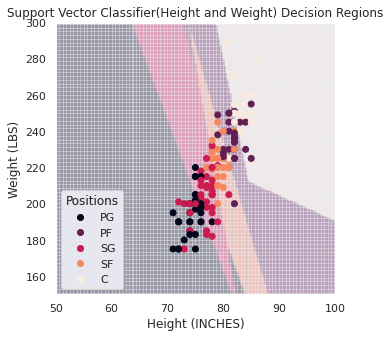

In [ ]:
U, V, W = make_decision_regions(x=np.linspace(50,100, 200), y=np.linspace(150, 300, 200), model=model)
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.pcolormesh(U, V, W, shading="auto", alpha=0.1)
classes= list(dataframe_logistic['position'])
scatter=ax.scatter(*X_te.T, c=y_te)

legend1 = ax.legend(handles=scatter.legend_elements()[0],
                    loc="lower left", title="Positions",labels=classes)
ax.add_artist(legend1)
plt.title("Support Vector Classifier(Height and Weight) Decision Regions")
plt.xlabel("Height (INCHES)")
plt.ylabel("Weight (LBS)")
plt.show()

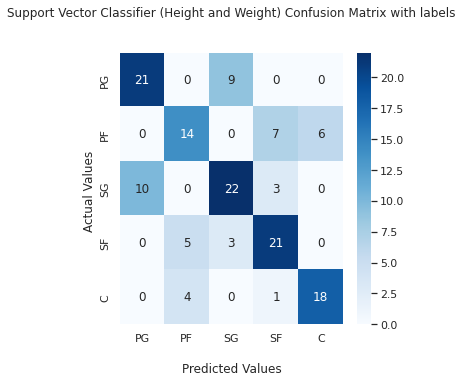

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Support Vector Classifier (Height and Weight) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

The Support Vector Classifier correctly predicts Point Guards for 21 out of 30 of the players in the test set, with it being incorrectly predicted as a Shooting Guard 9 times. Power Forwards are correctly predicted 14 out of 27 times, with it being predicted incorrectly as a Small Forward 7 times and a Center 6 times. Shooting guards are identified correctly 22 out of 35 times, it is most misidentified as a Point Guard 10 times, and as a Small Forward 3 times. Small Forwards are correctly identified 21 out of 29 times, and misidentified as a Power Forward 5 times, and a Shooting Guard 3 times. Centers are correctly identified 18 out of 23 times, it is misidentified as a power forward 4 times, and a Small Forward 1 time. Overall these are pretty reasonable, and when a players position is misidentified it is usually because the position they play as has a height and weight overlap with other positions.


**Decision Trees**

Decision Trees are supervised learning algorithms having a predefined target variable that's commonly utilised in non-linear decision making with a basic linear decision surface. They can be adapted to solve classification or regression problems. The goal is to learn simple decision rules from data features to develop a model that predicts the value of a target variable. Different subsets of the dataset are formed as a result of the splitting, with each instance belonging to one of them. Terminal or leaf nodes are the final subsets, whereas internal nodes or split nodes are the intermediate subsets. The average outcome of the training data in this node is used to predict the outcome in each leaf node.

Stratified sampling is used since there is an imbalance in classes and the preferred scoring metric is accuracy.


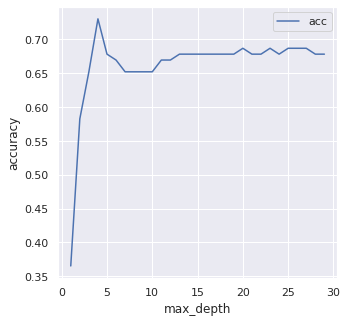

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr,random_state=42)
max_depth = []
acc = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier( max_depth=i)
 dtree.fit(U_tr, v_tr)
 pred = dtree.predict(U_val)
 acc.append(accuracy_score(v_val, pred))
 max_depth.append(i)

d = pd.DataFrame({'acc':pd.Series(acc),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()


A decision stump is a decision tree with only one node. The decision is made entirely on the basis of a single binary attribute of the sample.


The max depth of a tree can be set to 5 as the accuracy reaches a maximum at this level.

In [ ]:
model = DecisionTreeClassifier( max_depth=5)
clf=model.fit(X_tr, y_tr)
#print(tree.plot_tree(clf))
y_pred=clf.predict(X_te)
acc_te = accuracy_score(y_te,y_pred )
ic(acc_te);

ic| acc_te: 0.6805555555555556


The accuracy obtained for classification tree is 68.06%.


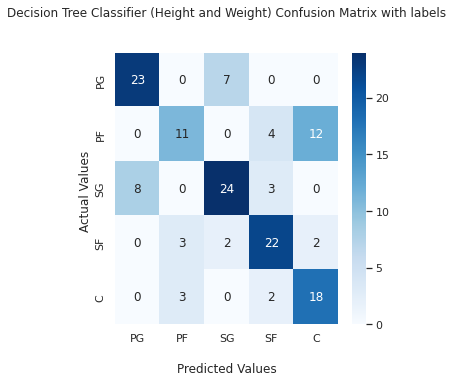

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Decision Tree Classifier (Height and Weight) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

The Decision Tree Classifier for Height and Weight correctly predicts Point Guards for 23 out of 30 of the players in the test set, with it being incorrectly predicted as a Shooting Guard 7 times. Power Forwards are correctly predicted 11 out of 27 times, with it being predicted incorrectly as a Small Forward 4 times and as a Center 12 times. This means it was more incorrectly predicted to be  a Center than it was correctly identified as a power forward. Shooting guards are identified correctly 24 out of 35 times, it is most misidentified as a Point Guard 8 times, and as a Small Forward 3 times. Small Forwards are correctly identified 22 out of 29 times, and misidentified as a Power Forward 3 times, and a Shooting Guard 2 times, and as a center 2 times. Centers are correctly identified 18 out of 23 times, it is misidentified as a power forward 3 times, and a Small Forward 2 times.


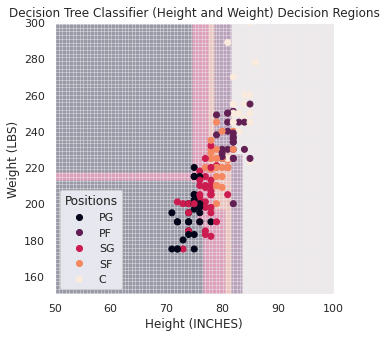

In [ ]:
U, V, W = make_decision_regions(x=np.linspace(50,100, 200), y=np.linspace(150, 300, 200), model=model)
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.pcolormesh(U, V, W, shading="auto", alpha=0.1)
classes= list(dataframe_logistic['position'])
scatter=ax.scatter(*X_te.T, c=y_te)

legend1 = ax.legend(handles=scatter.legend_elements()[0],
                    loc="lower left", title="Positions",labels=classes)
ax.add_artist(legend1)
plt.title("Decision Tree Classifier (Height and Weight) Decision Regions")
plt.xlabel("Height (INCHES)")
plt.ylabel("Weight (LBS)")
plt.show()

**Random Forests**

​​The Random Forest Classifier algorithm is an ensemble approach since it uses the Decision Tree Classifier method but creates several Decision Trees instead of just one. It takes advantage of random sampling, as each tree learns from a random sample of data points that are generated without replacement, and it only considers a subset of the features when splitting nodes. This randomization in the generation of individual trees reduces the risk of overfitting and increases the model's overall predictive accuracy. This is because the final forecasts are calculated by averaging the results of each individual tree.

When compared to a single Decision Tree, the Random Forest Classifier allows us to investigate the feature importance more deeply. This is because, whereas a single decision tree may focus on a specific area of the data and so connect high importance with that feature even if it doesn't, random sampling and feature selection over numerous decision trees allows us to find which features consistently have high relevance. We can use the average predictive ability of the features to reduce the variance that would be associated with feature importance if we used a single tree by generating many trees.

We can either eliminate features that aren't important and re-run the models with this knowledge, or we can just use the information to determine which features aren't vital for the model. Removing features reduces the model's complexity and hence the compute time, so the trade-off is between the information acquired from features against the compute time.


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_grid = np.arange(1, 50)
gd_accs_te = []
rf_accs_te = []
U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr,random_state=42)
for n_estimators in tqdm(n_estimators_grid):
  gbt1_model = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=n_estimators, random_state=1))
  gbt1_model = gbt1_model.fit(U_tr, v_tr)
  gd_acc = accuracy_score(v_val, gbt1_model.predict(U_val))
  gd_accs_te.append(gd_acc)

  rf1_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=n_estimators, random_state=42))
  rf1_model = rf1_model.fit(U_tr, v_tr)
  rf_acc = accuracy_score(v_val, rf1_model.predict(U_val))
  rf_accs_te.append(rf_acc)

  0%|          | 0/49 [00:00<?, ?it/s]

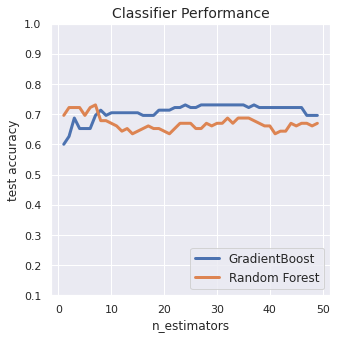

In [ ]:
plt.ylim(0.1, 1)
plt.xlabel("n_estimators", fontsize=12)
plt.ylabel("test accuracy", fontsize=12)
plt.title("Classifier Performance", fontsize=14)
plt.plot(n_estimators_grid, gd_accs_te, lw=3, label="GradientBoost")
plt.plot(n_estimators_grid, rf_accs_te, lw=3, label="Random Forest")
#plt.plot([0, 300], [mean_stump_acc, mean_stump_acc], "m--", lw=2, label="Stump baseline")
#plt.plot([0, 300], [mean_tree_acc, mean_tree_acc], "g--", lw=2, label="Tree baseline")
plt.legend(fontsize=12, loc="lower right")
plt.show()

In [ ]:
ic (max(rf_accs_te),rf_accs_te.index(max(rf_accs_te)))

ic| max(rf_accs_te): 0.7304347826086957
    rf_accs_te.index(max(rf_accs_te)): 6


(0.7304347826086957, 6)

In [ ]:
ic (max(gd_accs_te),gd_accs_te.index(max(gd_accs_te)))

ic| max(gd_accs_te): 0.7304347826086957
    gd_accs_te.index(max(gd_accs_te)): 23


(0.7304347826086957, 23)

We get maximum test accuracy with random forests when no_of_estimators = 6
with around 73 percent, we get the same accuracy of gradient boosted tree with 23 estimators, we will build Random forests as it has less no estimators.


In [ ]:
rf1_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=6, random_state=42))
rf1_model = rf1_model.fit(X_tr, y_tr)
y_pred = rf1_model.predict(X_te)
rf_acc = accuracy_score(y_te, y_pred)
rf_acc

0.6944444444444444

The accuracy on the test dataset for random forests for the features Height and Weight is 69.4%.

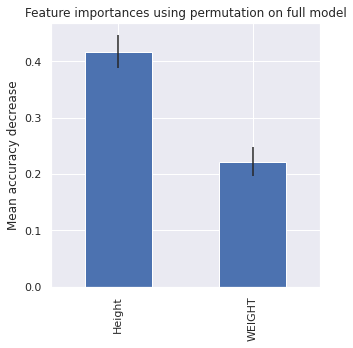

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf1_model, X_te, y_te, n_repeats=10, random_state=1, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=np.array(train_columns))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


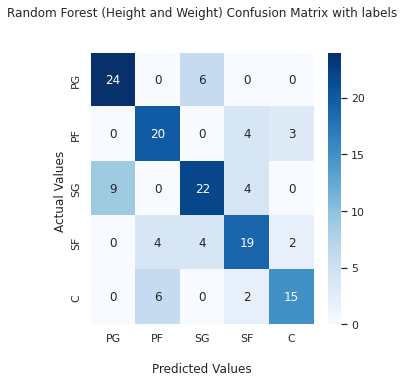

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Random Forest (Height and Weight) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

The Random Forest Classifier for Height and Weight correctly predicts Point Guards for 24 out of 30 of the players in the test set, with it being incorrectly predicted as a Shooting Guard 6 times. Power Forwards are correctly predicted 20 out of 27 times, with it being predicted incorrectly as a Small Forward 4 times and as a Center 3 times. For Height and Weight Classification, the Random Forest classifier  appears to classify Power Forwards most accurately. Shooting guards are identified correctly 22 out of 35 times, it is most misidentified as a Point Guard 9 times, and as a Small Forward 4 times. Small Forwards are correctly identified 19 out of 29 times, and misidentified as a Power Forward 4 times, and a Shooting Guard 4 times, and as a center 2 times . Centers are correctly identified 15 out of 23 times, it is misidentified as a Power Forward 6 times, and a Small Forward 2 times.


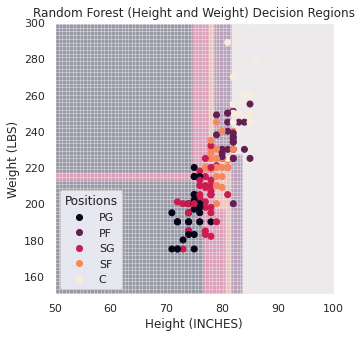

In [ ]:
U, V, W = make_decision_regions(x=np.linspace(50,100, 200), y=np.linspace(150, 300, 200), model=model)
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.pcolormesh(U, V, W, shading="auto", alpha=0.1)
classes= list(dataframe_logistic['position'])
scatter=ax.scatter(*X_te.T, c=y_te)

legend1 = ax.legend(handles=scatter.legend_elements()[0],
                    loc="lower left", title="Positions",labels=classes)
ax.add_artist(legend1)
plt.title("Random Forest (Height and Weight) Decision Regions")
plt.xlabel("Height (INCHES)")
plt.ylabel("Weight (LBS)")
plt.show()

**KNN classification**


The K-NN method assumes that the new case/data and existing cases are similar and places the new case in the category that is most similar to the existing categories. The KNN method stores all available data and classifies a new data point based on its similarity to the existing data. This means that new data can be quickly sorted into a category using the KNN method.


In [ ]:
ks = np.arange(1, 50, 2)

n_repeats = 200
accs_val = np.zeros((n_repeats, len(ks)))

for i in tqdm(range(n_repeats)):
  U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr)
  for j, k in enumerate(ks):
      model = KNeighborsClassifier(n_neighbors=k)
      model.fit(U_tr, v_tr)
      accs_val[i, j] = accuracy_score(v_val, model.predict(U_val))

scores = accs_val.mean(axis=0)
k = ks[np.argmax(scores)]
ic(k)



  0%|          | 0/200 [00:00<?, ?it/s]

ic| k: 11


11

The best number of neighbours is 11.

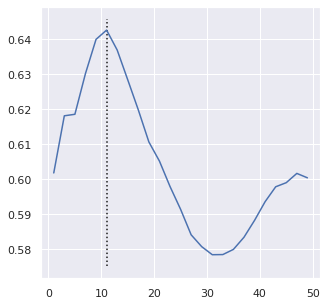

In [ ]:
plt.plot(ks, scores)
plt.vlines(k, *plt.ylim(), colors="k", linestyles=":", label=f"max. validation accuracy, $k$={k}")

In [ ]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_tr, y_tr)
y_pred=model.predict(X_te)
acc_knearest= accuracy_score(y_pred,y_te)
print(acc_knearest)

0.6527777777777778


The accuracy on the test dataset for random forests for the features Height and Weight is 65.3%


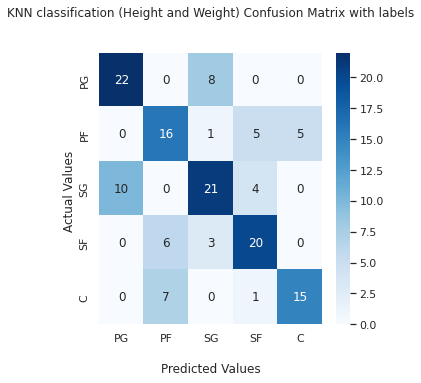

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('KNN classification (Height and Weight) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

The KNN Classifier for Height and Weight correctly predicts Point Guards for 22 out of 30 of the players in the test set, with it being incorrectly predicted as a Shooting Guard 8 times. Power Forwards are correctly predicted 16 out of 27 times, with it being predicted incorrectly as a Small Forward 5 times and as a Center 5 times, and as a Shooting Guard 1 time. Shooting guards are identified correctly 21 out of 35 times, it is most misidentified as a Point Guard 10  times, and as a Small Forward 4 times. Small Forwards are correctly identified 20 out of 29 times, and misidentified as a Power Forward 6 times, and a Shooting Guard 3 times. Centers are correctly identified 15 out of 23 times, it is misidentified as a Power Forward 7 times, and a Small Forward 1 times.

Overall it seems that when using Height and Weight, most of the classifiers we used predicted positions in a reasonable manner. Even when the classifiers incorrectly predicted a position it was usually a sensible position. For example, defensive positions were misclassified as other defensive positions, or positions mainly made up by big men were predicted as other positions made up by big men.

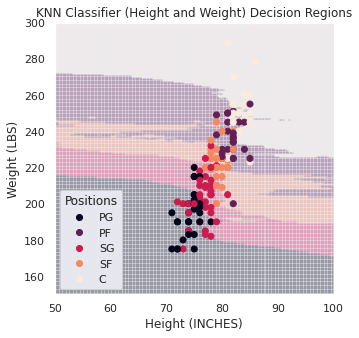

In [ ]:
U, V, W = make_decision_regions(x=np.linspace(50,100, 200), y=np.linspace(150, 300, 200), model=model)
plt.figure(figsize=(5, 5))
ax = plt.gca()
ax.pcolormesh(U, V, W, shading="auto", alpha=0.1)
classes= list(dataframe_logistic['position'])
scatter=ax.scatter(*X_te.T, c=y_te)

legend1 = ax.legend(handles=scatter.legend_elements()[0],
                    loc="lower left", title="Positions",labels=classes)
ax.add_artist(legend1)
plt.title("KNN Classifier (Height and Weight) Decision Regions")
plt.xlabel("Height (INCHES)")
plt.ylabel("Weight (LBS)")
plt.show()

#**Question 2**

*Using classification models (Logistic Regression, Classification Trees, Random Forest, Gradient Boosted Trees) can we apply NBA players in-game statistics to classify players based on positions?*



We can either eliminate features that aren't important and re-run the models with this knowledge, or we can just use the information to determine which features aren't vital for the model. Removing features reduces the model's complexity and hence the compute time, so the trade-off is between the information acquired from features against the compute time.

When a single feature value is randomly shuffled, the permutation feature importance is defined as the decrease in a model score. Because this technique breaks the link between the feature and the target, the model score drops, indicating how much the model is reliant on the feature.


In [ ]:
stats_classify=['Pos','three_pt_pct', 'two_pt_pct', 'eFG%',
       'FT%', 'PF', 'Year', '3P/G', '2P/G', 'ORB/G', 'DRB/G', 'AST/G', 'STL/G',
       'BLK/G', 'TOV/G','NETRTG', 'TS_pct']

In [ ]:
df_stat_classify=df[stats_classify]
df_stat_classify['Position'] = df_stat_classify.apply(lambda row: post_dict[row.Pos], axis=1)
y=df_stat_classify['Position']
y=y.to_numpy()
X=df_stat_classify[["three_pt_pct", "two_pt_pct","eFG%","FT%","PF","3P/G","2P/G", "ORB/G","DRB/G","AST/G","STL/G","BLK/G","TOV/G","NETRTG","TS_pct"]]

train_columns=X.columns
X=X.to_numpy()
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_stat_classify

,Pos,three_pt_pct,two_pt_pct,eFG%,FT%,PF,Year,3P/G,2P/G,ORB/G,DRB/G,AST/G,STL/G,BLK/G,TOV/G,NETRTG,TS_pct,Position
0,PG,0.282,0.457,0.452,0.807,90,2013,0.421687,3.554217,0.457831,1.987952,4.096386,0.590361,0.108434,1.783133,-12.0,52.9,0
1,PG,0.306,0.429,0.434,0.850,102,2010,0.397590,2.734940,0.240964,1.843373,2.915663,0.650602,0.072289,1.325301,-2.8,59.9,0
2,PF,0.000,0.497,0.497,0.657,205,2013,0.000000,6.146341,3.121951,6.146341,2.085366,1.109756,0.573171,2.024390,-5.2,52.7,1
3,PF,0.000,0.483,0.479,0.751,207,2013,0.000000,5.231707,2.439024,4.365854,1.109756,0.500000,1.365854,1.829268,5.3,51.8,1
4,PG,0.331,0.393,0.413,0.802,218,2013,0.536585,2.573171,0.743902,3.426829,8.585366,2.329268,0.134146,2.695122,-1.8,48.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,PG,0.000,1.000,0.667,1.000,4,2017,0.000000,1.000000,0.000000,0.000000,2.500000,1.000000,0.000000,1.500000,-10.1,77.3,0
2815,SF,0.000,0.500,0.375,0.750,1,2017,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,15.5,46.1,3
2816,PG,0.250,0.400,0.389,0.500,4,2018,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,-19.8,40.5,0
2817,PG,0.500,0.400,0.458,1.000,3,2018,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,-9.5,59.7,0


**Logistic Regression**

In [ ]:
U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr,random_state=42)
model = LogisticRegression(max_iter=1000000)
model.fit(U_tr, v_tr)
y_pred = model.predict(U_val)
acc = accuracy_score(v_val, y_pred)
print(acc)

0.6363636363636364


Accuracy for logistic regression on validation set is 63.64%. Next, we would like to check whether increasing the features thorugh polynomial regression will help us in improving the efficiency of the logistic regression model to better classify the players with stats alone.


**Polynomial Regression**

In [ ]:
degrees = np.arange(1, 3)

n_repeats = 100
accs_val = np.zeros((n_repeats, len(degrees)))

for i in range(n_repeats):
  U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr)
  for j, degree in enumerate(degrees):
      model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=degree), LogisticRegression(max_iter=1000000))
      model.fit(U_tr, v_tr)
      accs_val[i, j] = accuracy_score(v_val, model.predict(U_val))

scores = accs_val.mean(axis=0)
degree = degrees[np.argmax(scores)]

In [ ]:
print(scores)

[0.63026608 0.63955654]


The accuracy score wasn't improving by increasing the number of features, so it is best to make a model of logistic regression with it's original features.

In [ ]:
model = LogisticRegression(max_iter=100000)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)
acc = accuracy_score(y_te, y_pred)
ic(acc)

ic| acc: 0.6578014184397163


0.6578014184397163

So, logistic Regression has an accuracy of 65.78% percent on test set.

In [ ]:
dataframe_logistic=pd.DataFrame(model.coef_, columns=train_columns)
post_dict_reverse = {4:"C", 1:'PF',  0:'PG',  3:'SF', 2:'SG'}
dataframe_logistic=dataframe_logistic.reset_index()
dataframe_logistic.rename(columns = {'index':'position'}, inplace = True)
dataframe_logistic['position'] = dataframe_logistic.apply(lambda row: post_dict_reverse[row.position], axis=1)
dataframe_logistic.set_index("position")

,three_pt_pct,two_pt_pct,eFG%,FT%,PF,3P/G,2P/G,ORB/G,DRB/G,AST/G,STL/G,BLK/G,TOV/G,NETRTG,TS_pct
position,,,,,,,,,,,,,,,
PG,0.327794,0.560341,0.334536,1.244720,0.004000,0.223079,-0.249741,-0.988986,-2.190210,2.092319,1.585027,-1.720187,-0.267055,0.002710,-0.053605
PF,-0.217740,-0.188642,-0.040223,-0.769324,0.000315,-0.161512,0.008996,1.185625,1.187851,-0.657243,-1.870524,0.715344,-0.533872,-0.004210,0.014000
SG,0.445468,-1.861888,-1.474068,-0.034994,0.001335,1.108128,0.543334,-1.322907,-0.850085,-0.166068,1.975422,-0.828735,0.238616,0.013581,-0.011876
SF,0.111181,0.559674,-0.123677,-0.125145,-0.003489,0.436858,0.077338,-0.221147,0.502106,-0.665901,1.427147,-0.326063,0.311992,0.015043,-0.010140
C,-0.666703,0.930515,1.303433,-0.315256,-0.002161,-1.606553,-0.379927,1.347415,1.350339,-0.603107,-3.117072,2.159641,0.250320,-0.027125,0.061621


Position - Point Gaurd

In [ ]:
dataframe_logistic.iloc[0,:][1:]
sorted_scores=dataframe_logistic.iloc[0,:][1:].abs().sort_values(ascending=False)
top_5_traits = sorted_scores[0:5].index.values
dataframe_logistic.iloc[0,:][1:][top_5_traits]

DRB/G    -2.19021
AST/G    2.092319
BLK/G   -1.720187
STL/G    1.585027
FT%       1.24472
Name: 0, dtype: object

The top 5 coefficients for classifying a player into Point Guard suggests that these players have high Assist per game and steals per game  and low defensive rebounds per game in comaprision to others

Power Forward

In [ ]:
dataframe_logistic.iloc[1,:][1:]
sorted_scores=dataframe_logistic.iloc[0,:][1:].abs().sort_values(ascending=False)
top_5_traits = sorted_scores[0:5].index.values
dataframe_logistic.iloc[1,:][1:][top_5_traits]

DRB/G    1.187851
AST/G   -0.657243
BLK/G    0.715344
STL/G   -1.870524
FT%     -0.769324
Name: 1, dtype: object

The top 5 coefficients for classifying a player into Power Forward suggests that these players have high Offensive rebounds/game and high defensive rebounds per game and low steals per game.

Shooting Guard

In [ ]:
dataframe_logistic.iloc[2,:][1:]
sorted_scores=dataframe_logistic.iloc[0,:][1:].abs().sort_values(ascending=False)
top_5_traits = sorted_scores[0:5].index.values
dataframe_logistic.iloc[3,:][1:][top_5_traits]

DRB/G    0.502106
AST/G   -0.665901
BLK/G   -0.326063
STL/G    1.427147
FT%     -0.125145
Name: 3, dtype: object

Small Forward

In [ ]:
dataframe_logistic.iloc[3,:][1:]
sorted_scores=dataframe_logistic.iloc[0,:][1:].abs().sort_values(ascending=False)
top_5_traits = sorted_scores[0:5].index.values
dataframe_logistic.iloc[3,:][1:][top_5_traits]

DRB/G    0.502106
AST/G   -0.665901
BLK/G   -0.326063
STL/G    1.427147
FT%     -0.125145
Name: 3, dtype: object

The top 5 coefficients for classifying a player into Power Forward suggests that these players have high steals per game and defensive rebounds per game but low assists per game and offensive rebounds per game.

Center



In [ ]:
dataframe_logistic.iloc[4,:][1:]
sorted_scores=dataframe_logistic.iloc[0,:][1:].abs().sort_values(ascending=False)
top_5_traits = sorted_scores[0:5].index.values
dataframe_logistic.iloc[4,:][1:][top_5_traits]

DRB/G    1.350339
AST/G   -0.603107
BLK/G    2.159641
STL/G   -3.117072
FT%     -0.315256
Name: 4, dtype: object

The top 5 coefficients for classifying a player into Small forward suggests that these players have very low steals per game and assists per game but have high blocks per game and Offensive rebounds per game.

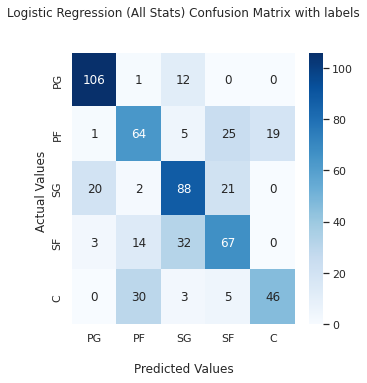

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)
ax = sns.heatmap(cf_matrix,fmt="d", annot=True, cmap='Blues')
ax.set_title('Logistic Regression (All Stats) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()


As per the confusion matrix, we can see that out of the 119 Point Guards included in the Testing Dataset which is the sum of columns of the first row, the model correctly predicted Point Guard 106 times. 12 times it thought the Point Guard was a Shooting Guard and 1 times it thought the Point Guard was a Small Forward. The model finds it difficult to classify Small Forwards which is the fourth row and misclassified it 3 times as Point Guard, 14 times as Power Forward, 25 times as Shooting Guard, and 3 times as Center.

**Decision Tree**

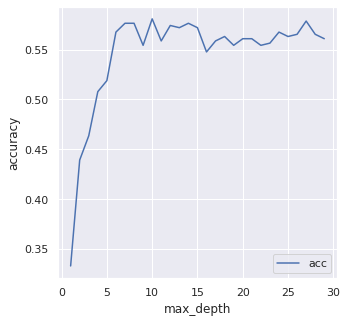

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr,random_state=42)
max_depth = []
acc = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier( max_depth=i)
 dtree.fit(U_tr, v_tr)
 pred = dtree.predict(U_val)
 acc.append(accuracy_score(v_val, pred))
 max_depth.append(i)

d = pd.DataFrame({'acc':pd.Series(acc),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()


The max depth of a tree can be set to 7 as the accuracy maxes out at this level.

In [ ]:
model = DecisionTreeClassifier( max_depth=7)
clf=model.fit(X_tr, y_tr)
#print(tree.plot_tree(clf))
y_pred=clf.predict(X_te)
acc_te = accuracy_score(y_te, y_pred)
ic(acc_te);

ic| acc_te: 0.601063829787234


The accuracy obtained for classification tree is 60.28%

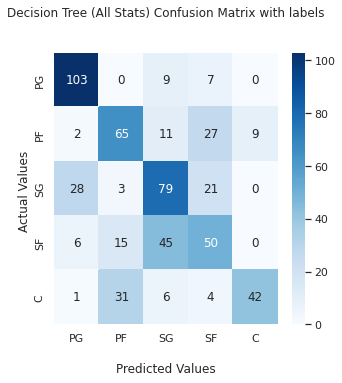

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)
ax = sns.heatmap(cf_matrix,fmt="d", annot=True, cmap='Blues')
ax.set_title('Decision Tree (All Stats) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

As per the confusion matrix, we can see that out of the 119 Point Guards included in the Testing Dataset which is the sum of columns of the first row, the model correctly predicted Point Guard 103 times. 9 times it thought the Point Guard was a Shooting Guard and 7 times it thought the Point Guard was a Small Forward. The model finds it difficult to classify Small Forwards which is the fourth row and misclassified it 6 times as Point Guard, 15 times as Power Forward, and 45 times as Shooting Guard.


**Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

n_estimators_grid = np.arange(1, 50)
ada_accs_te = []
rf_accs_te = []
U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr,random_state=42)
for n_estimators in tqdm(n_estimators_grid):
  gbt1_model = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=n_estimators, random_state=1))
  gbt1_model = gbt1_model.fit(U_tr, v_tr)
  ada_acc = accuracy_score(v_val, gbt1_model.predict(U_val))
  ada_accs_te.append(ada_acc)

  rf1_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=n_estimators, random_state=42))
  rf1_model = rf1_model.fit(U_tr, v_tr)
  rf_acc = accuracy_score(v_val, rf1_model.predict(U_val))
  rf_accs_te.append(rf_acc)

  0%|          | 0/49 [00:00<?, ?it/s]

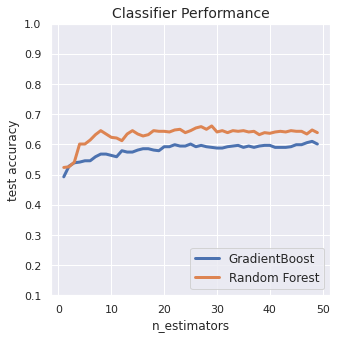

In [ ]:
plt.ylim(0.1, 1)
plt.xlabel("n_estimators", fontsize=12)
plt.ylabel("test accuracy", fontsize=12)
plt.title("Classifier Performance", fontsize=14)
plt.plot(n_estimators_grid, ada_accs_te, lw=3, label="GradientBoost")
plt.plot(n_estimators_grid, rf_accs_te, lw=3, label="Random Forest")
#plt.plot([0, 300], [mean_stump_acc, mean_stump_acc], "m--", lw=2, label="Stump baseline")
#plt.plot([0, 300], [mean_tree_acc, mean_tree_acc], "g--", lw=2, label="Tree baseline")
plt.legend(fontsize=12, loc="lower right")
plt.show()

In [ ]:
ic (max(rf_accs_te),rf_accs_te.index(max(rf_accs_te)))

ic| max(rf_accs_te): 0.6607538802660754
    rf_accs_te.index(max(rf_accs_te)): 28


(0.6607538802660754, 28)

We get maximum test accuracy with random forests when no_of_estimators = 28
with around 66 percent. We will fit the model with these estimators and print the output.

In [ ]:
rf1_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=28, random_state=42))
rf1_model = rf1_model.fit(X_tr, y_tr)
y_pred=rf1_model.predict(X_te)
rf_acc = accuracy_score(y_te, y_pred)
rf_acc

0.7145390070921985

The accuracy of random forests method is 71.45%.

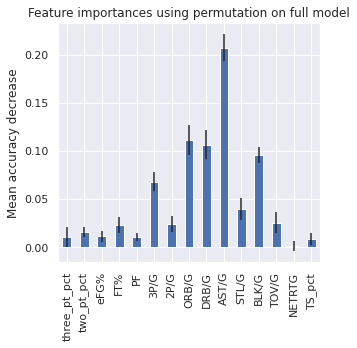

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf1_model, X_te, y_te, n_repeats=10, random_state=1, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=np.array(train_columns))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


Assists/Game, Offensive rebounds/Game, and Defensive rebounds/ game are the most important features.

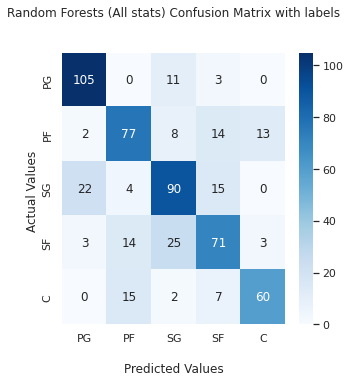

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)
ax = sns.heatmap(cf_matrix, fmt="d", annot=True, cmap='Blues')
ax.set_title('Random Forests (All stats) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

As per the confusion matrix, we can see that out of the 119 Point Guards included in the Testing Dataset which is the sum of columns of the first row, the model correctly predicted Point Guard 105 times. 11 times it thought the Point Guard was a Shooting Guard and 3 times it thought the Point Guard was a Small Forward. The model finds it difficult to classify Small Forwards which is the fourth row and misclassified it 3 times as Point Guard, 14 times as Power Forward, 25 times as Shooting Guard, and 3 times as Center.


**KNN classification**

In [ ]:
ks = np.arange(1, 50, 2)

n_repeats = 200
accs_val = np.zeros((n_repeats, len(ks)))

for i in tqdm(range(n_repeats)):
  U_tr, U_val, v_tr, v_val = train_test_split(X_tr, y_tr, test_size=0.2,stratify=y_tr)
  for j, k in enumerate(ks):
      model=make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))

      model.fit(U_tr, v_tr)
      accs_val[i, j] = accuracy_score(v_val, model.predict(U_val))

scores = accs_val.mean(axis=0)
k = ks[np.argmax(scores)]

  0%|          | 0/200 [00:00<?, ?it/s]

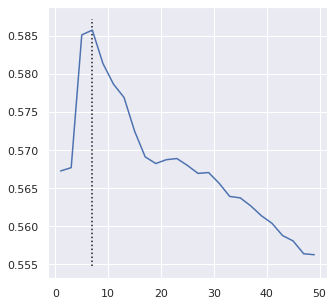

In [ ]:
plt.plot(ks, scores)
plt.vlines(k, *plt.ylim(), colors="k", linestyles=":", label=f"max. validation accuracy, $k$={k}")

In [ ]:
ic(k)

ic| k: 7


7

So, we can conclude that the best number of neighbours is 7.

In [ ]:
model=make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
model.fit(X_tr, y_tr)
y_pred= model.predict(X_te)
acc_te = accuracy_score(y_te, y_pred)
ic(acc_te);

ic| acc_te: 0.5868794326241135


With k-nearest neighbours we are getting an accuracy of 58.69%

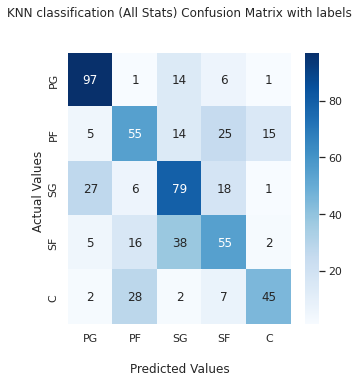

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('KNN classification (All Stats) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

As per the confusion matrix, we can see that out of the 119 Point Guards included in the Testing Dataset which is the sum of columns of the first row, the model correctly predicted Point Guard 97 times. 14 times it thought the Point Guard was a Shooting Guard, 6 times it thought the Point Guard was a Small Forward, 1 time it thought the Point Guard was a Center and 1 time it thought the Point Guard was a Power Forward. The model finds it difficult to classify Small Forwards which is the fourth row and misclassified it 5 times as Point Guard, 16 times as Power Forward, 2 times as Center, and 38 times as Shooting Guard.


**Gaussian Bayes**

Many of the stats are normally distributed aross each position based on our exploratory analysis. So we wanted to apply Gaussian Bayes classifier to check if get better accuracy.

In [ ]:
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class GaussianBayes(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    X, y = check_X_y(X, y)
    self.classes_ = unique_labels(y)
    self.X=X
    self.y=y
    return self

  def predict(self, X):
    check_is_fitted(self)
    X = check_array(X)
    unique_classses=np.unique(y_tr)
    k=len(unique_classses)
    prior_prob=np.zeros(k)
    mu=np.zeros((k,self.X.shape[1]))
    cov=np.zeros((k,self.X.shape[1],self.X.shape[1]))
    for a in range(k):
      prior_prob[a]=sum(self.y==unique_classses[a])/len(self.y)
      mu[a,:] = self.X[self.y == a].mean(axis=0)
      cov[a,:,:] = np.cov(self.X[self.y == a], rowvar=False)

    prob_labels=np.zeros((k,X.shape[0]))
    for a in range(k):
      mvn=multivariate_normal(mean=mu[a,:], cov=cov[a,:,:])
      prob_labels[a,:]=mvn.pdf(X).reshape(1,-1)*prior_prob[a]
    y_hat=prob_labels.argmax(axis=0)
    return y_hat



In [ ]:
model = GaussianBayes()
y_pred=model.fit(X_tr,y_tr).predict(X_te)

acc_te = accuracy_score(y_te, y_pred)
acc_te

0.6223404255319149

 The accuracy obtained by Gaussian Bayes method is 62.23%.


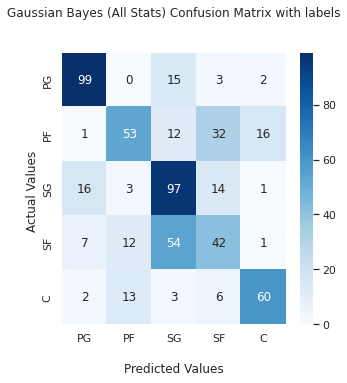

In [ ]:
import seaborn as sns

from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_te, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Gaussian Bayes (All Stats) Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.rcParams['figure.figsize'] = (5, 5)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(list(dataframe_logistic["position"].values))
ax.yaxis.set_ticklabels(list(dataframe_logistic["position"].values))

## Display the visualization of the Confusion Matrix.
plt.show()

With the  Gaussian bayes classifier for all stats the confusion matrix Point Guards were correctly predicted for 99 players out of 119, however 15 Point Guards were identified as Shooting Guards, 3 misidentified as Small Forwards, and 2 as Centers. Power Forwards were also Heavily misidentified with only 53 out of 114 Power Forwards identified correctly. It seems this classifier gets Power Forwards heavily confused with Small Forwards. The position that had the worst classification was Small Forwards where the minority 42 out of 116 identified correctly, it was most misidentified as a Shooting Guard 54 times.


Overall, the Random Forest method has the highest accuracy 71.45% over all the models when classifying players based on stats alone.

#**Question 3**

*Using PCA and K Means clustering can we find similar groups of players for each position and discover the most productive players and seasons by position?*

In [ ]:
df=pd.read_csv("dfaftercleaning.csv")

In [ ]:
#df_pca
df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)

Here we are removing players who have played less than 40 games as we dont want them to have high stats with less number of games but getting clustered into a group with elite performers when they have most likely have got those stats by playing very less games in that season.

Shooting Gaurd.

In [ ]:
df_pcas=df_pcas[df_pcas['Pos']=='SG']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)

In [ ]:
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]

In [ ]:
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
df_pca.head(5)

,three_pt_pct,two_pt_pct,eFG%,FT%,PF,3P/G,2P/G,ORB/G,DRB/G,AST/G,STL/G,BLK/G,TOV/G,NETRTG,TS_pct
0,0.393,0.490,0.541,0.837,176,2.451220,2.975610,0.621951,2.902439,2.402439,0.926829,0.170732,1.341463,-2.1,57.4
1,0.330,0.474,0.478,0.788,197,0.841463,6.182927,0.463415,3.134146,5.743902,1.719512,0.280488,3.219512,-0.9,49.3
2,0.359,0.494,0.512,0.860,229,2.878049,5.780488,0.768293,5.341463,7.463415,1.695122,0.621951,4.560976,1.6,59.8
3,0.389,0.482,0.516,0.793,193,1.500000,3.780488,0.329268,2.451220,3.060976,0.841463,0.207317,1.890244,-6.2,54.8
4,0.345,0.476,0.489,0.806,147,1.365854,3.817073,0.719512,5.085366,2.475610,0.865854,0.475610,1.695122,-3.1,53.5


We will scale the data next to perform PCA.

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)

,three_pt_pct,two_pt_pct,eFG%,FT%,PF,3P/G,2P/G,ORB/G,DRB/G,AST/G,STL/G,BLK/G,TOV/G,NETRTG,TS_pct
0,0.676937,0.439900,0.961067,0.540193,1.163011,1.684680,0.183114,0.349268,0.557858,0.176093,0.267706,-0.479374,0.042475,-0.266259,0.871265
1,-0.458898,0.092090,-0.545698,-0.058965,1.618573,-0.639259,2.183090,-0.153699,0.801533,2.600595,2.244755,0.122330,2.603684,-0.056287,-0.979816
2,0.063947,0.526852,0.267477,0.821430,2.312761,2.300876,1.932142,0.813545,3.122861,3.848241,2.183922,1.994297,4.433118,0.381156,1.419733
3,0.604821,0.265995,0.363144,0.002173,1.531799,0.311443,0.685009,-0.579287,0.083333,0.653915,0.054793,-0.278806,0.790880,-0.983666,0.277091
4,-0.188461,0.135566,-0.282612,0.161134,0.533903,0.117782,0.707822,0.658786,2.853536,0.229184,0.115626,1.192026,0.524781,-0.441236,-0.019996


In [ ]:
len(scaled_pca.columns)

15

We have 15 dimensions for each player.

In [ ]:
#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



array([0.35519138, 0.53580636, 0.64134646, 0.70917009, 0.7704234 ,
       0.81340428, 0.85113551, 0.88464051, 0.91472053, 0.93839078])

We can see that if we take only one PC, we are accouting for 35 percent variation, whereas if we take 10 principal components we are accounting for 93 percent of total variation.

The below code allows us to append in a list which dimensions in our original dataset contribute to a particular  prinicpal component.

In [ ]:
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)

Concat the PCA components with the labels which indicates which players stats they represent.

In [ ]:
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca

In [ ]:
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

When reducing to one dimension a single player does stand out. James Harden's 2018, 2016 and 2014 seasons are all stand alone seperate from the other players. Generally, our one-dimensional does a fairly good job at seperating the good players from the bad players. James Harden, Bradley Beal, Demar Derozan, etc. are all towards the front while towards the end there are players like Lance Stephenson and Orlando Johsnon. These are players that were never near an all-star or all-nba caliber. However, there is probably a lot of information and nuance that is being lost in translation. Consequently, we are going to look at the Shooting Guards from more dimensions.


Along with finding the best players we also want to find the players who are similar. So, we want to implement k-means clustering along with PCA to get the players who are similar and at the same time find the best players for that position through the graph. We also want to compare how the clustering changes as we increase the dimensions by taking more principal components each step. We want to do clustering for PC1 alone first and then consider 2, consider 3 and consider 10. As we saw above that PC1 alone accounts for only 35 percent of total variation. Whereas, if we take 10 principal components we are accounting for more 90 percent of total variation.

So, through next step we want to find the number of clusters that need to be taken into consideration, when we run it for 1,3 and 10 components.

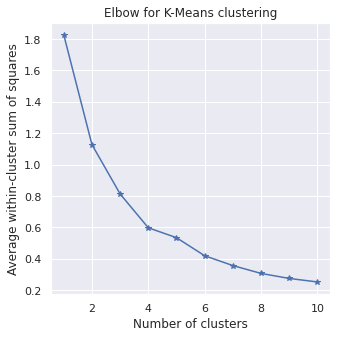

In [ ]:
#@title To find no of clusters with only one principal component

X=pca.iloc[:,0:1] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('Elbow for K-Means clustering');

We are choosing the no of clusters to be based on elbow point 4.

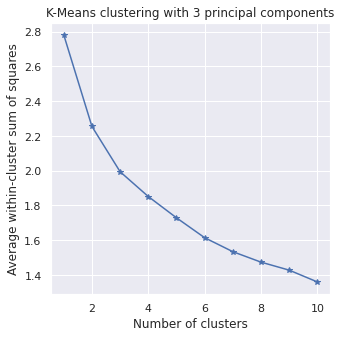

In [ ]:
#@title To find no of clusters with only three principal components
X=pca.iloc[:,0:3] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('K-Means clustering with 3 principal components');

We are choosing the number of clusters to be 5 for 3 principal components as there is no clear elbow point and average within cluster distance decreases from 4 to 5.

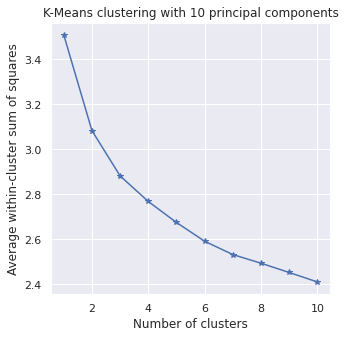

In [ ]:
#@title To find no of clusters with 10 principal components
X=pca.iloc[:,0:10] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('K-Means clustering with 10 principal components');

We are choosing the no of clusters to be 5 for 10 principal components as there is no clear elbow point and average within cluster distance decreases from 4 to 5. We are choosing the no of clusters to be 5 for 10 principal components as there is no clear elbow point and average within cluster distance decreases from 4 to 5.  The below code does k-means clustering on one principal component to find index which will be used to automate the clustering on all princpal components and store them in a dataframe.

In [ ]:
#@title k-means clustering with one principal component to find index.
df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="James Harden") & (df_cluster["Year"]==2018)]["PLAYER"])

213    James Harden
Name: PLAYER, dtype: object


In [ ]:
index=213

index=213

This index is 213 because we want to compare how clustering is done in comparision.  We increase the dimensions and for that cluster labels should remain same, but when we implement k-means it randomly sets cluster labels. To allow us to compare how clustering is done across the dimensions; we are taking the best players index and setting it to get the cluster name constant for each iteration where we immplement clustering for one principal component and next two and so on.

In [ ]:
#@title Clustering code for multiple dimensions

import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
  labels_dict[p] = labels
  if p==1:
    n=n+1

NameError: ignored

In [ ]:
#@title additional code for storing the cluster labels for multiple scenarios in a dataframe
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)
df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)
comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

**Comparing most productive shooting Guard cluster with only one principal componet, 3 principal components and 10 components.**

In [ ]:
set(comp_1_players) - set(comp_10_players)

{'Avery Bradley-2017-BOS',
 'Danny Green-2014-SAS',
 'Giannis Antetokounmpo-2014-MIL',
 'Jimmy Butler-2014-CHI',
 'Patrick Beverley-2017-HOU',
 'Paul George-2011-IND'}

Clustering with only one principal component considered these players along with their respective seasons to be most productive when they are not productive.

In [ ]:
set(comp_10_players) - set(comp_1_players)

{'Andre Miller-2011-DEN',
 'DeMar DeRozan-2014-TOR',
 'Joe Johnson-2010-ATL',
 'Kent Bazemore-2018-ATL',
 'Nicolas Batum-2018-CHO',
 'O.J. Mayo-2012-DAL'}

These players with respective seasons were not included in the cluster with only one principal component.

In [ ]:
set(comp_3_players) - set(comp_10_players)

{'Avery Bradley-2017-BOS',
 'Jimmy Butler-2014-CHI',
 'Marcus Smart-2017-BOS',
 'Patrick Beverley-2017-HOU',
 'Paul George-2011-IND',
 'Will Barton-2016-DEN'}

Clustering with three principal component considered these players  respective seasons to be most productive when they are not productive.

In [ ]:
set(comp_10_players) - set(comp_3_players)

set()

Clustering with three principal components didn't miss any of the players with their best seasons which are there in the clustering with ten dimensions.

K-means with 3 PCA, it considered four players on the boundaries who are not best players in the cluster. While it missed none, as we increase the PCA's the total variation increases and the k-means moves closer to the actual shape. So, even with 3 PCA's we are getting decent results for shooting Guard position beacuse of the better seperation of the most productive players from the rest.



Visualization can be modified in the below graph accordingly to see how clusters are formed with single component alone, three principal components and ten by just changing the color parameter's value df_cluster['comp_3'] with df_cluster['comp_1'] or df_cluster[comp_10]. Here we are showing the clusters as we are able to obtain a good cluster with just three principal components.

In [ ]:

fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_3'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

In the graph above there are five clusters graphed along the 3 PCA. Just by looking  at the names of the players it is evident that the red colored players along the right side of the graph represent the most productive or acclaimed players. Players such as James Harden, Jimmy Butler and Jrue Holiday are all former all-stars and are represented in red. When juxtaposed with Lance Stephenson and other players in the far left orange cluster there is clearly a drop in quality.

Continuing, the light green cluster contains high-level defenders at the Shooting Guard position that are not scoring threats; this includes NBA players such as Andre Roberson (a notoriously bad offensive player but overall fantastic defensive player), Tony Allen and Robert Convigton. On the opposite end, the purple cluster contains efficient shooters that cannot scale their shooting with higher volume. Kyle Korver and Joe Harris are the highlights of this cluster. Finally, the blue cluster seems to be a combination of the defenders from the green cluster and the shooters from the purple. While James Harden seems to be the clear favorite, it is essential to understand what the three PCAs represent to pick the most productive player for that position.  

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
TOV/G     0.368940
DRB/G     0.362278
AST/G     0.354445
STL/G     0.354182
2P/G      0.351335
PF        0.329567
ORB/G     0.269538
BLK/G     0.264837
3P/G      0.201633
TS_pct    0.144576
dtype: float64


pc2
eFG%            0.512879
three_pt_pct    0.472119
TS_pct          0.394679
3P/G            0.389518
FT%             0.240540
ORB/G          -0.178923
two_pt_pct      0.172598
NETRTG          0.170344
2P/G           -0.138349
STL/G          -0.126602
dtype: float64


pc3
FT%          -0.475532
two_pt_pct    0.455735
ORB/G         0.334515
TOV/G        -0.274543
NETRTG        0.268412
eFG%          0.252658
AST/G        -0.251772
BLK/G         0.251650
3P/G         -0.237112
2P/G         -0.163930
dtype: float64




The higher the players are in PC1 the better they perform in AST/G, 2P/G, BLK/G and 3P/G. This group primarily represents total volume statistics. There are no metrics  regarding shooting percentages or efficiency. The higher players are in PC2 the more efficient the player. This is represented by stats such as true-shooting percentage, two-point percentage, three-point percentage etc.
Finally, the higher players are in PC3 the worst they are in shooting volume (negative values for 3P/G and 2P/G) and ball-handling volvume (AST/G).



Overall, James Harden's 2018 season is our choice for most productive Shooting Guard season in our dataset. Below we will detail his PCA values:


*   PC1: 8.1
*   PC2: 1.8
*   PC3: 1.3


His PC1 value of 8.1 is the highest of any player on list and it highlights his ability to run an offense on high volvume. Furthermore, his PC2 was the highest of those four seasons of his clustered to the right indicating that his volume and efficiency peaked at the same time which is very rare. Usually, productivity comes at the cost of efficiency.     

Position- Center

We repeated the same above process with every other position. So, we are hiding all the code cells for this position to just show the results of how many principal components were selected.


In [ ]:
#@title Code for Position Center
df=pd.read_csv("dfaftercleaning.csv")

df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)
df_pcas=df_pcas[df_pcas['Pos']=='C']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
df_pca
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)
len(scaled_pca.columns)
#We have 15 dimensions for each player.
#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)
pca
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="DeMarcus Cousins") & (df_cluster["Year"]==2018)]["PLAYER"])


index=314
#we are taking the a player's index who is farthest on pca1 and setting it to get the cluster name constant for each iteration where we take only one principal component and next two and son on.
index=314
import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
    #print(p)
    #print(labels)
  labels_dict[p] = labels
  if p==1:
    n=n+1
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)
df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)

comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



314    DeMarcus Cousins
Name: PLAYER, dtype: object


Looking at centers from one-dimension our best player was Dwight Howard. However, Dwight Howard was not nearly as prohibitively greater than other centers as James Harden was for SGs. In fact, Demarcus Cousins in 2018 was only .04 less. Our one-dimension reduction is fairly good at seperating the good from the bad players. Some of the other highlights of the top tier players with a high PC1 value are Joel Embiid, Andre Drummond and Anthony Davis.

**Comparing most productive Center cluster with only one PC, 3 PCs and 10 components.**


In [ ]:
len(set(comp_10_players) - set(comp_1_players))

65

In [ ]:
len(set(comp_1_players)-set(comp_10_players))

23

Clustering on PC one is not  good as there are lot of missing players from it when compared to the ones formed with ten players.

In [ ]:
set(comp_3_players) - set(comp_10_players)

{'Dewayne Dedmon-2019-ATL', 'Kevin Love-2018-CLE', 'Pau Gasol-2017-SAS'}

In [ ]:
len(set(comp_10_players) - set(comp_3_players))

34

Clustering with 3 PC when compared with that of ten, we are missing 34 player's seasons which can be considered to be most productive. So, choosing 3 PCs may not be good ideas as we are not getting clear separation of clusters with 3 alone for centers. So, we will produce visualizations for clustering done on ten PCs to be mapped to 3 dimensions using the below code.

In [ ]:


fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_10'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

Similar to our analysis regarding SGs there are five clusters in this k-means clustering graph. Also, there does not seem to be as clear of a distinction between the good and bad clusters as with SGs. The blue cluster represents players the new-age centers that are more mobile, better shooters and skilled ball-handlers. The players highlighting this cluster are Demarcus Cousins, Joel Embiid and Anthony Davis. These are all-NBA or all-star level players and universally distnguished as some of the best in their position.

However, in the lower green cluster are Dwight Howard's and Deandre Jordan's (for example) best seasons. Both of whom are also talented. This light green cluster at the bottom represents old-school Centers that focused on rebounding and defending and were awful shooters. While the orange cluster seems to be a collection of the worst Centers, the blue and red seem to be a mixed bag. This is an interesting trend where it is difficult for our model to make meaningful clusters toward the center of the graph. In order to find the cause for these players placement and decide our best center season we must look at what the three PCs represent.

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
DRB/G     0.412843
TOV/G     0.383845
2P/G      0.377329
STL/G     0.343585
ORB/G     0.338502
BLK/G     0.318836
PF        0.316714
AST/G     0.272959
NETRTG    0.109784
TS_pct    0.085706
dtype: float64


pc2
two_pt_pct      0.515754
eFG%            0.508437
TS_pct          0.415557
FT%            -0.282496
AST/G          -0.259702
NETRTG          0.193919
TOV/G          -0.176446
3P/G           -0.176344
three_pt_pct   -0.144809
ORB/G           0.121968
dtype: float64


pc3
3P/G            0.537883
three_pt_pct    0.428414
FT%             0.353201
TS_pct          0.296574
ORB/G          -0.292706
AST/G           0.263875
eFG%            0.244928
two_pt_pct      0.215895
PF             -0.169263
NETRTG          0.119988
dtype: float64




PC1: The first Principal Component shows positives for rebounding, blocking and steals. All of these statistics (as shown in our exploratory analysis) represent the prototypical center. This is a player that defends at a high-level and scores a lot of two-pointers on dunks. This makes sense as some of the players highest in PC1 like Dwight Howard embody this player-mold.

PC2: Being higher in this category positively correlates with overall efficiency like True-shooting and Effective Field Goal percentage. However, it negatively correlates with three-point shooting, assists, free-throw percentage etc. This PC highlights the disadvantages of the average center. Centers usually have bad coordination and are the worse shooting position. Their lacking coordination is also why they are bad at ball-handling and assisting.

PC3: This represents the new-age, advante garde center. Here the player excels at three-point shooting volume and efficiency, free-throw percentage and assists per game. Until recently having a center that could run an offense on the perimiter was unheard of. But, the best centers in todays game break that mold.

Demarcus Cousins' 2018 season will be our best center season from our dataset. This choice, however, is not nearly as clear-cut as the Shooting Guard position. It comes down to the philosophy of the coach and the needs of the team. Below are his PC values:

*   PC1:  6.0
*   PC2: -3.0
*   PC3: -4.4

Cousins' PC3 value of 4.35 is the highest in the dataset and indicates that he is a highly skilled shooter and ball-handler for his position. This reaffirmed by his low PC2 value. While he may be sacrificing some two-point efficiency and rebounding, we feel it's more than acceptable with his elite playmaking potential. However, some coaches that prefer defense and rebounding may want a center like Howard or even Gobert.  

Position- Small Forward

In [ ]:
#@title Code for Small Forward
df=pd.read_csv("dfaftercleaning.csv")
#df_pca
df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)
df_pcas=df_pcas[df_pcas['Pos']=='SF']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)
len(scaled_pca.columns)

#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

X=pca.iloc[:,0:3] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
# plt.plot(K, avgWithinSS, 'b*-')
# plt.xlabel('Number of clusters');
# plt.ylabel('Average within-cluster sum of squares');
# plt.title('Elbow for K-Means clustering');

df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="LeBron James") & (df_cluster["Year"]==2017)]["PLAYER"])
index=171

index=171
import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
  labels_dict[p] = labels
  if p==1:
    n=n+1
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)

df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)
comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



171    LeBron James
Name: PLAYER, dtype: object


For small forwards LeBron James is at the peak of our graph when looking at one dimension. This is not surprising as he is one of the greatest players of all time. Not far behind, however, are Giannis Antetokounmpo and Kevin Durant. Towards the end of our graph are less known players like Abdel Nader and Earl Clark. Hopefully, the k-means classification along with three dimensions can help differentiate the top tier players.  

Next we will try to find the no of components which is ideal for k-means clustering similar to process done for other positions.

In [ ]:
set(comp_1_players) - set(comp_10_players)

{'Khris Middleton-2018-MIL'}

In [ ]:
len(set(comp_10_players) - set(comp_1_players))

22

We shouldn't clustering on PC1 as it missing the most productive seasons of many small forwards.



In [ ]:
set(comp_3_players) - set(comp_10_players)

{'Kawhi Leonard-2013-SAS',
 'Khris Middleton-2018-MIL',
 'Robert Covington-2017-PHI',
 'Robert Covington-2018-PHI'}

In [ ]:
set(comp_10_players) - set(comp_3_players)

{'Andre Iguodala-2011-PHI',
 'Andrei Kirilenko-2010-UTA',
 'Brandon Ingram-2018-LAL',
 'Luol Deng-2011-CHI',
 'Luol Deng-2012-CHI',
 'Tyreke Evans-2013-NOP'}

Here, as we are misclustering only 10 data points we can consider taking the advantage of dimenisionanlity reduction given by 3 PCA alone. Next, we will visualize the clusters formed through

In [ ]:
fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_3'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

Similar to our previous k-means analysis we have three dimensions and five clusters. More-so than any other clustering method we have a clear and distinct group of best players. This is represented by the purple cluster on the right. It contains some of the most iconic players ever such as LeBron James, Kevin Durant and Kawhi Leonard. These players are all significant scoring threats, both from three-point and two-point range.

The green cluster that follows the purple contains a combination of players that are competent all-around players without the insane volume/efficiency of the puprle group. Some examples are Gordon Hayward and Khris Middleton. There are also the typical 'three-and-D' players that one might expect to find in abundance at the small-forward position. Below is a blue cluster which has players that are primarily defenders and adequate two-point scorers, but inadequate three-point shooters for the position. The red and orange clusters are very similar but the main difference seems to be that the orange cluster contains worse shooters. We will hone in on what these PCAs represent to fully flesh out and discover the best player at the small-forward position.

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
DRB/G     0.378383
TOV/G     0.366566
2P/G      0.348135
AST/G     0.345905
STL/G     0.312868
3P/G      0.268668
PF        0.251764
BLK/G     0.251476
ORB/G     0.209485
NETRTG    0.193633
dtype: float64


pc2
three_pt_pct   -0.489387
eFG%           -0.453847
ORB/G           0.352947
TS_pct         -0.351078
3P/G           -0.314935
BLK/G           0.206989
NETRTG         -0.200094
FT%            -0.196070
2P/G            0.176495
TOV/G           0.128623
dtype: float64


pc3
two_pt_pct     -0.608935
FT%             0.447317
eFG%           -0.322655
3P/G            0.284415
TS_pct         -0.248009
NETRTG         -0.212950
ORB/G          -0.212492
three_pt_pct    0.162948
BLK/G          -0.159257
TOV/G           0.155600
dtype: float64




PC1: The first Principal Component represents a small-forward that is a good defender, rebounder and volume scorer. Furthermore, these small-forwards can orchestrate an offense on every level, as they are also good at assisting. It's no surprise that LeBron is the highest in this category.  

PC2: While the second PC is slightly positvely related with good-defense (positive metric for Blocks Per Game) and high two-point volume (positive metric for two-pointers per game) there is an abundance of negative aspects associated with being high in this component. The most prominent being low efficiency and low three-point volume. Furthermore, PC2 is even associated with low net-rating which means the team typically performs less than optimal with the player on the court.

PC3: Similar to PC2, PC3 indicates that being high in this category means low overall efficiency, but in this case it is also balanced with high three point volume and three-point efficiency. Players that don't do much more than shoot threes are probably very high in this category.

The season and player we're choosing as the best small forward in our dataset is LeBron James' 2017 season. For one, it would be a travesty for our list to not contain a player who is ubiquitously considered one of the greatest players ever in our list. Furthermore, the statistics back-up his world renowned status. LeBron had (far and away) the highest PC1 value with 7.32. Below we will list his PC values:

*   PC1: 7.3
*   PC2: 0.2
*   PC3:-2.0

PC1 was the clearest positive PC and it indicates that LeBron is an offensive engine that can score, create and defend at a superb level. Also, LeBron is very low in PC2 and PC3, most likely due to his excellent overall efficiency. Many of Kevin Durant's stellar seasons were somewhat close, but in the end, he wasn't able to make it on this list over LeBron's 2017 season.

Point Gaurd

In [ ]:
#@title Code for Point Gaurd
df=pd.read_csv("dfaftercleaning.csv")
#df_pca
df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)
df_pcas=df_pcas[df_pcas['Pos']=='PG']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
df_pca
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)
len(scaled_pca.columns)

#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)
pca
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

X=pca.iloc[:,0:3] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
#plt.plot(K, avgWithinSS, 'b*-')
#plt.xlabel('Number of clusters');
#plt.ylabel('Average within-cluster sum of squares');
#plt.title('Elbow for K-Means clustering');
df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="James Harden") & (df_cluster["Year"]==2019)]["PLAYER"])
index=89
index=89
import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
  labels_dict[p] = labels
  if p==1:
    n=n+1
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)
df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)
comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



89    James Harden
Name: PLAYER, dtype: object


Once again James Harden's gaudy offensive statistics seem to seperate him from the pack of Point Guards. However, Stephen Curry's 2016 season is not far behind. The least productive player is Chris Quinn. In order to make our decision we will look towards the k-means clustering and multiple dimensions for more context.

In [ ]:
set(comp_1_players) - set(comp_10_players)

{'Chris Paul-2010-NOH',
 "De'Aaron Fox-2019-SAC",
 'Derrick Rose-2010-CHI',
 'Eric Bledsoe-2014-PHO',
 'Eric Bledsoe-2017-PHO',
 'Giannis Antetokounmpo-2015-MIL',
 'Giannis Antetokounmpo-2016-MIL',
 'Jrue Holiday-2012-PHI',
 'Jrue Holiday-2017-NOP',
 'Kyle Lowry-2014-TOR',
 'Kyrie Irving-2012-CLE',
 'Rajon Rondo-2010-BOS',
 'Rajon Rondo-2015-SAC',
 'Rajon Rondo-2016-SAC'}

Clustering with PCA 1 considered these players seasons as most productive   even though they are not productive.



In [ ]:
set(comp_10_players) - set(comp_1_players)

{'Mike Conley-2017-MEM'}

Only one data point were not included in the cluster with only one PC, when compared to 10 PCs.

In [ ]:
set(comp_3_players) - set(comp_10_players)

{'Chris Paul-2010-NOH'}

In [ ]:
set(comp_10_players) - set(comp_3_players)

set()

We can see that clustering done with 3 PCs is identical to that of ten PCs, as clustering formed with 3 PCs includes only one player's season as performing well, when it is not. For this position even forming clusters with only PCA can do a very good job at identifying the most productive Point Gaurds. We are still choosing three PCs to be most productive. So, we can understand that for Point Guards we have a clear separation of really good players from the rest in general, as we are able to capture everyone perfectly with just three PCs.

In [ ]:
tfig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_3'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

Like our other k-means clustering analysis there are five clusters and three PCs. Once again, the best PGs seem to have a distinct group of players that are above the rest. The green players (just by looking on the names) are point-guards that focus on scoring more than assisting. This includes players such as Steph Curry, James Harden, Chris Paul, Kyrie Irving etc. with expection of Paul, most of these players are primarily prolific scores. It shows how the PG position has evolved overtime.

Interestingly the red cluster represents the opposite. The players in that group are typically better defenders, facillitators and finishers at the rim. Some of the standouts of this group are Rajon Rondo and a young Giannis. The purple cluster has a lot of quality Point Guards that are all-around quality players but they lack the high-ceiling and productivity of the earlrier group. The blue cluster, on the other hand, contains a lot of players that are a good at one thing but nothing else (one-dimensional athletes). One example is Shaun Livingston in the uppermost part of the blue cluster. While he excelled at paint scoring relative to his Point Guard peers, there was very little else to his game. Finally, the orange cluster represents players who are unproductive or overall negatives.

In order to see if our assertions based on previous knowledge of well-known players is correct and to pick the overall best player, we will look at the PCs and what each one represents.

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
DRB/G     0.346963
TOV/G     0.333585
AST/G     0.319277
STL/G     0.316085
2P/G      0.314470
PF        0.283182
ORB/G     0.279837
3P/G      0.266712
TS_pct    0.215476
eFG%      0.211292
dtype: float64


pc2
eFG%           -0.443483
three_pt_pct   -0.351921
FT%            -0.344733
TS_pct         -0.341074
BLK/G           0.282841
ORB/G           0.261367
3P/G           -0.247533
two_pt_pct     -0.237980
NETRTG         -0.236645
DRB/G           0.178408
dtype: float64


pc3
two_pt_pct      0.547863
three_pt_pct   -0.525258
3P/G           -0.304556
BLK/G           0.300693
AST/G          -0.233392
TS_pct          0.218334
TOV/G          -0.195727
eFG%            0.158949
STL/G          -0.146944
NETRTG          0.146038
dtype: float64




PC1: In this PC there a lot of the total volume stats such as two-pointers per game, three pointers per game and assists per game. Similar to other PCs in our previous position graphs, this is a good indicator of a players ability to run an offense. It represents a Point Guard who can facilitate and score efficiently.

PC2: This PC indicates that being high in it lends towards lower efficiency (in virtually every efficiency stat) and even lower three-point per game volume. The major positive associated with the PC2 is that its positively related to rebounding and defense. This represents some of the players (like Lonzo Ball) in our red cluster that was mentioned earlier.

PC3: This final componet shows a positive correlation with eFG%, TS_pct and other efficiency based statistics. It is also positively correlated with net-rating. However, it is a mixed bag of goods as the three-point volume and efficiency is negatively related with this component.

The player and season we pick for the best at the PG position is Steph Curry's 2016 season. Lets compare him to James Harden who initially jumped off the screen with his 2019 season in Houston.

Curry (2016)

*   PC1: 7.7
*   PC2:-4.1
*   PC3:-0.6

Harden (2019)

*  PC1:  8.7
*  PC2:  0.2
*  PC3: -4.1

Harden had the highest PC1 of 8.7, which indicates that his volume as a creator and scorer was immense. This is somewhat diminished, however, by the fact that his PC2 is .17, which is relatively high amongst the best Point Guards. This indicates that his volume was accompanied by low-efficiency. Steph Curry on the other hand, had a PC2 of -4 (!!) which means his volume was on incredible efficiency. This makes sense, as Steph Curry's 2016 season is the only unanimous MVP season ever.  



Power Forward

In [ ]:
#@title Power Forward
df=pd.read_csv("dfaftercleaning.csv")
#df_pca
df_pcas=df[df["G"]>40]
df_pcas.columns
df_pcas=df_pcas.reset_index()
df_pcas.drop(['Unnamed: 0',"index"],  axis=1, inplace=True)
df_pcas

df_pcas=df_pcas[df_pcas['Pos']=='PF']
df_pcas=df_pcas.reset_index()
df_pcas.drop("index",axis=1,inplace=True)
df_pca_labels=df_pcas[['PLAYER', 'Pos', 'Age', 'Tm', 'G','Year','TEAM', 'WEIGHT', 'COLLEGE', 'COUNTRY', 'DRAFT YEAR',
       'DRAFT ROUND', 'DRAFT NUMBER','Height']]
df_pca = df_pcas.drop(df_pca_labels.columns,axis=1)
df_pca
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_pca = scale.fit_transform(df_pca)
scaled_pca= pd.DataFrame(scaled_pca)
scaled_pca
scaled_pca.columns = [df_pca[:0]]
scaled_pca.head(5)
len(scaled_pca.columns)

#scaled_pca_SG=scaled_pca_SG.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

principle_components = pca.fit_transform(scaled_pca)

pca.explained_variance_ratio_.cumsum()
#len(principle_components)
loading_scores_all = []
n_pca=[0,1,2]
#print(p)
for p in n_pca:
  loading_scores = pd.Series(pca.components_[p], index=scaled_pca.columns)
  #print(loading_scores)
  ## now sort the loading scores based on their magnitude
  sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

  # get the names of the top 10 genes
  top_10_traits = sorted_loading_scores[0:10].index.values

  loading_scores_all.append(loading_scores[top_10_traits].to_dict())

pca = pd.DataFrame(principle_components)
pca.columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
pca.dropna(inplace=True)
pca
df_after_pca = pd.concat([pca, df_pca_labels], axis = 1)
#df_after_pca
df_after_pca["zeroed"]=0
fig = px.scatter(df_after_pca, x= df_after_pca["pc1"], y= df_after_pca["zeroed"] ,hover_data=['PLAYER','Year'])
fig.show()

X=pca.iloc[:,0:3] # Using the the dataset of Section 1
K = range(1,11)  # Apply kmeans 1 to 10
kmeans_models = [skc.KMeans(k).fit(X) for k in K]
centroids = [m.cluster_centers_ for m in kmeans_models]
D_k = [spd.cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# plot elbow curve
# plt.plot(K, avgWithinSS, 'b*-')
# plt.xlabel('Number of clusters');
# plt.ylabel('Average within-cluster sum of squares');
# plt.title('Elbow for K-Means clustering');

df_pc_only=df_after_pca.iloc[:,0:1]
#print(df_pc_only)
#df_pc_only=clean_dataset(df_pc_only)
kmeans_model = skc.KMeans(n_clusters=4,init='k-means++',random_state=42)
#kmeans_model = skc.KMeans(n_clusters=5,init='k-means++',random_state=42)

kmeans_model.fit(df_pc_only)
centroids = kmeans_model.cluster_centers_
centroids
df_pc_only['cluster_labels_kmeans'] = kmeans_model.labels_
df_cluster = pd.concat([df_pc_only, df_pca_labels], axis = 1)

print(df_cluster[(df_cluster['PLAYER']=="Giannis Antetokounmpo") & (df_cluster["Year"]==2019)]["PLAYER"])
index=200

index=200
import sklearn as sk
import sklearn.cluster as skc

labels_dict={1: [],2: [], 3: [], 10: []}
pca_comp=[1,2,3,10]
finder_constant=0
n=4
for p in pca_comp:
  #print(n)
  df_pc_only=df_after_pca.iloc[:,0:p]
  kmeans_model = skc.KMeans(n_clusters=n,init='k-means++',random_state=42)
  kmeans_model.fit(df_pc_only)
  centroids = kmeans_model.cluster_centers_
  labels = list(kmeans_model.labels_)
  if p==1:
    label_top=labels[index]
    finder_constant=label_top
  else:
    label_top_1=labels[index]
    changer= {0:0,1:1,2:2,3:3,4:4,5:5}
    changer[label_top_1]=label_top
    changer[label_top]=label_top_1
    #print(changer)
    labels= [changer[a] for a in labels]
  labels_dict[p] = labels
  if p==1:
    n=n+1
labels_components=pd.DataFrame(labels_dict)
labels_components.columns=["comp_1","comp_2","comp_3","comp_10"]
df_cluster = pd.concat([df_pc_only,labels_components, df_pca_labels], axis = 1)

df_cluster["player-year-tm"] = df_cluster["PLAYER"] + "-" + df_cluster["Year"].astype(str) + "-" + df_cluster["Tm"]
df_cluster['comp_1'] = df_cluster['comp_1'].astype(str)
df_cluster['comp_2'] = df_cluster['comp_2'].astype(str)
df_cluster['comp_3'] = df_cluster['comp_3'].astype(str)
df_cluster['comp_10'] = df_cluster['comp_10'].astype(str)
finder_constant = str(finder_constant)
comp_1_players=df_cluster[df_cluster["comp_1"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_2_players=df_cluster[df_cluster["comp_2"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_3_players=df_cluster[df_cluster["comp_3"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()
comp_10_players=df_cluster[df_cluster["comp_10"]==finder_constant][["player-year-tm"]]["player-year-tm"].tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



200    Giannis Antetokounmpo
Name: PLAYER, dtype: object


For Power Forwards, the player who is on the right most is Giannis Antetokounmpo.

Next, we will try to find the PCs on which k-means clustering can be done to get right appropriate clusters.

In [ ]:
len(set(comp_1_players) - set(comp_10_players))

15

Clustering with pca 1 considered 15 data points as most productive Power Forward player seasons when they are not productive.

In [ ]:
len(set(comp_10_players) - set(comp_1_players))

7

These players seasons were not included in the cluster with only one PC.

In [ ]:
len(set(comp_3_players) - set(comp_10_players))

32

In [ ]:
len(set(comp_10_players) - set(comp_3_players))

5

For Power Forward position, cluster formed with taking three PCs is doing bad in comparision to cluster formed with only one dimension. Overall, both the scenarios are not forming well defined clusters, so we will choose to do clustering with 10 PCs for this position too just like Center.

In [ ]:
fig = px.scatter_3d(
    df_cluster, x= df_cluster["pc1"], y=df_cluster["pc2"], z=df_cluster["pc3"], color=df_cluster['comp_10'],
    title=f'k-means Clustering after dimensionality reduction',
    hover_name=df_cluster['player-year-tm']
)


fig.show()

For our final k-means graph there are five clusters and three PCs. The best players seemed to be represented in the purple cluster. Virtually all of the most famous and renowned players at the position exist in the purple cluster including Anthony Davis, Kevin Durant and Giannis Antetokounmpo. The Power Forward position consists primarily of strong defenders and paint-scorers. With Durant and LeBron being some of the few consistent three-point scorers.

The orange cluster contains a lot of 'new-age' Power Forwards such as kevin love, an older Dirk Nowitzki and Lauri Markannen. Most of this entire cluster has players that are above-average three point shooters for their position. But whether or not they are net-positive defenders or playmakers seems dubious and on a case by case basis. The blue cluster has PFs that are good defenders and maybe paint-scorers, not much else. Both the green and red cluster seem to contain suboptimal players.

While we have a general idea of who the best players are in this subset, understanding the PCs will illuminate our choice for best Power Forward.

In [ ]:

for a in n_pca:
  print(f'pc{a+1}')
  print(pd.Series(loading_scores_all[a]))
  print()
  print()


pc1
TOV/G     0.389657
DRB/G     0.382373
2P/G      0.372043
AST/G     0.327982
STL/G     0.325573
PF        0.309249
ORB/G     0.268657
BLK/G     0.239796
NETRTG    0.177657
TS_pct    0.165650
dtype: float64


pc2
eFG%           -0.422505
three_pt_pct   -0.422274
3P/G           -0.403785
TS_pct         -0.393398
ORB/G           0.302250
FT%            -0.246366
two_pt_pct     -0.234348
NETRTG         -0.210160
2P/G            0.151488
BLK/G           0.122091
dtype: float64


pc3
two_pt_pct     -0.510301
3P/G            0.410384
eFG%           -0.384313
TS_pct         -0.286362
three_pt_pct    0.282543
FT%             0.242804
AST/G           0.222194
ORB/G          -0.189675
BLK/G          -0.187528
TOV/G           0.183386
dtype: float64




PC1: The first PC indicates a strong positive relationship with numerous significant statistical cateogries such as rebounding, assisting, blocking, two-pointers per game etc. This profile represents a combination of a Point Guard and Center. Players with a high PC1 are likely big-players that handle the ball and are versatile defenders. Furthermore, they are likely prolific scorers in the paint.

PC2: Unlike the first PC this PC is negatively correlated with a lot of important categories. Most of these are shooting-efficiency based where being high in this component indicates the player is a bad free-throw and three-point shooter. Basically, the antithesis of a player like Kevin Durant and where we would expect someone like Shaquille O'Neal to be (if he was included in this analysis).

PC3: Positively associated with three-pointers per game and free-throws per game. However, it is negatively associated with defensive statistics like blocks and rebounds. This archetype represents a player like Kevin Love whose shooting streches the opposing defense but he is limited defensively. These players are known as 'stretch bigs' and are seen as a dual-sword as their offensive benefits are mitigated by them being defensive liabilities. Furthermore, while they're three-point shooting is efficient, that does not mean that they are overall efficient as they are prone to take long two-pointers.

Power Forwards represented one of the most difficult positions to pick the best player and season. It ultimaetly came down to three seasons: LeBron James' 2018 season, Giannis' 2019 season and Kevin Durant's 2017 season. Below their PCA values are listed:

  LeBron

*   PCA1: 7.2
*   PCA2: -2.4
*   PCA3: 1.6

Giannis
*   PCA1: 8.3
*   PCA2: -1.1
*   PCA3: -1.1

Kevin

*   PCA1:  5.0
*   PCA2: -3.8
*   PCA3: .06

In the end, we chose Giannis' 2019 season as the greatest power forward season in our dataset. While Kevin's low PCA2 value indicates that he was extremely efficient, he lacked the volume of Giannis and LeBron. Furthermore, while LeBron's PCA3 value indicates he was more efficient than Giannis, we decided to priortize Giannis' elite package of paint scoring with rim protection. For the bigger positions such as Power Forward and Center the significance of denfense is heighneted and we wish to reflect that in our decision. However, all three of these players (and a couple others on the list) would all be credible options.


# **Conclusion**

In order to evaluate  whether or not the players we chose are realistic choices we will evaluate their nba statistics for the season and their accolades. If the statistics is bolded that means the player led the league in that category that season.

PG: Steph Curry (2016)

*   Stats, PPG: *30.1; Ast: 6.7; TRB: 5.4 STL: **2.1; BLK: 0.2; TS%: *.669**(League average: 56.4)
*   Accolades: *Unanimous MVP* (First and only); *Team won most games ever*

SG: James Harden (2018)

*   Stats, PPG: *30.4*; Ast: 8.8; TRB: 5.4; STL: 1.8; BLK: 0.7; TS%: .616 (league-average: 56%)
*   Accolades: *MVP*

SF: LeBron James (2017)

*   Stats, PPG: 26.4; Ast: 8.7; TRB: 8.6; STL: 1.2; BLK: 0.6; TS%: .619 (league-average: 60.8%)
*   Accolades: First Team All NBA

PF: Giannis Antetokoumpo (2019)

*   Stats, PPG: 27.7 PPG; Ast: 4.8; TRB: 10.0; STL: 1.3; BLK: 1.5; TS%: .644(league-average: .56%)
*   Accolades: *MVP*; All-Defensive First Team

C: Demarcus Cousins (2018)

*   Stats, PPG: 25.2 PPG; Ast: 5.4; TRB: 12.9; STL: 1.6; BLK: 1.6 (this is not a typo, he averaged the same amount of blks as stls); TS%: .583(league-average: .56%)
*   Accolades: N/A

Overall, it's clear that our method (at the very least) can distinguish the great players from the mediocre. It seems extremely unlikely for there to be a case where a bad player would be chosen among the best. Furthermore, three out of five players we chose won mvp in their respective season. Steph Curry had quite possibly the greatest season of all time in 2016 and James Harden in 2018 combined his elite playmaking as well as scoring with superb efficiency for the first time. In Giannis' MVP season he combined playmaking and excellent defense with paint-scoring at levels that haven't been seen since Shaquille O'Neal.

The two interesting cases are Demarcus Cousins 2018 and LeBron James' 2017 season. For Demarcus, he did not recieve any accolades because he only played around 50 games due to lingering injuries; he is most likely the most contentious pick on this list. While most people would probably prefer Anthony Davis and Embiid over Cousins, the PCA really highlighted his impressive passing abilities. He is truly a unique player and we feel he deserved his spot on this list. Finally, there is LeBron James' 2017 season. It was by no means a bad season, but it's interesting that it stood out so greatly on the PCA chart when the actually stat-line seems like the run of the mill LeBron season. It would be interesting to look deeper into the advanced statistics like PER and win-shares to see if they also back-up our findings.

Our analysis ultimately does have a lot of real-world application and utility. We were successfully able to classify player positions based on height and weight with logistic regression at 70% accuracy. Furthermore, we successfully classified players positions based on their statistical profiles by using Random Forest, also with around 70% accuracy.

The PCA and k-means analysis seemed to highlight the best players at each position, even when only using one dimension. With three dimensions we were able to make more informative groupings of players that highlighted the different play styles that exist in the NBA and within positions. In the future our analysis could be used in a multitude of different ways. For example, it could be utilized to discover young players that are on the way to becoming elite. In our Point Guard model, a strange outlier existed in the red cluster that went to the upper right of the graph. It represented Giannis' 2016 season, where he had yet to fully emerge but his potential as a facillitator and paint scorer was clear; there are other applications such as sports betting and basketball fantasy.

# **Future Work**

* The simplest method to improve the model is to use a larger dataset; the dataset had contained 10 seasons from the years 2010 to 2019, which isn't small, but a larger dataset with more training/testing data would have been beneficial
* More robust feature engineering in general
* More complex machine learning models can be utilized
* Various boosting algorithms like AdaBoost, LightGBM can also be utilized
* Combining in-game statistics and physical characteristics for better results
* Extending the project to fantasy basketball



# **References**

**Datasets**

NBA Player Dataset (combined multiple excel files of one year NBA stats to create new dataset)
* https://drive.google.com/file/d/1ko962Y5wFYTfIkEgl0LI6OEG4il5P3oo/view?usp=sharing (5000 rows, 31 columns)
* https://www.basketball-reference.com/leagues/NBA_2020_per_game.html (2019-20 NBA player stats: Per game. Basketball. (n.d.). Retrieved April 6, 2022)
* https://craftednba.com/player-traits/length (NBA player body statistics)
* https://www.nba.com/stats/players/bio/ (Height and Weight NBA Player Data)
* https://www.kaggle.com/datasets/drgilermo/nba-players-stats


**Other Sources**
* Players Bios. NBA Stats. (n.d.). Retrieved April 6, 2022, from https://www.nba.com/stats/players/bio/?dir=1   
* Wilkinson, P. (2021, October 29). Introduction to random forest classifiers. Medium. Retrieved April 6, 2022, from https://towardsdatascience.com/introduction-to-random-forest-classifiers-9a3b8d8d3fa7
* chris20lee. (n.d.). Chris20lee/predict-NBA-player-position-random-forest: Uses random forest to predict NBA players' positions based solely on their in-game statistics. GitHub. Retrieved April 6, 2022, from https://github.com/chris20lee/Predict-NBA-Player-Position-Random-Forest
* Fischler, B. (2021, February 9). NBA Machine Learning Position Predictor. Medium. Retrieved April 6, 2022, from https://medium.com/analytics-vidhya/nba-machine-learning-position-predictor-488fef42ac1c  
* G. L. T.(2022, March 22). Hyperparameter tuning with GRIDSEARCHCV. GreatLearning Blog: Free Resources what Matters to shape your Career! Retrieved April 6, 2022, from https://www.mygreatlearning.com/blog/gridsearchcv/  
* Molnar, C. (2022, March 29). Interpretable machine learning. 5.4 Decision Tree. Retrieved April 6, 2022, from https://christophm.github.io/interpretable-ml-book/tree.html  
* ‘Polynomial Regression | Polynomial Regression In Python’. Analytics Vidhya, 15 Mar. 2020, https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/.
* Yadav, Ajay. ‘DECISION TREES’. Medium, 11 Jan. 2019, https://towardsdatascience.com/decision-trees-d07e0f420175.
* ‘Regex - Changing Height (Feet and Inches) to an Integer in Python Pandas’. Stack Overflow, https://stackoverflow.com/questions/26986655/changing-height-feet-and-inches-to-an-integer-in-python-pandas. Accessed 7 Apr. 2022.
* Variance Inflation Factor (VIF) Explained - Python. https://etav.github.io/python/vif_factor_python.html. Accessed 7 Apr. 2022.
* Scatter Plots - Problem Solving with Python. https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.10-Scatter-Plots/. Accessed 7 Apr. 2022.
* Matplotlib.Axes.Axes.Scatter — Matplotlib 3.5.0 Documentation. https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.scatter.html. Accessed 7 Apr. 2022.
* ‘Feature Importances with a Forest of Trees’. Scikit-Learn, https://scikit-learn/stable/auto_examples/ensemble/plot_forest_importances.html. Accessed 7 Apr. 2022.
* Lee, Ceshine. ‘Feature Importance Measures for Tree Models — Part I’. Veritable, 8 Sept. 2020, https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3.
* ‘R - How to Interpret Mean Decrease in Accuracy and Mean Decrease GINI in Random Forest Models’. Cross Validated, https://stats.stackexchange.com/questions/197827/how-to-interpret-mean-decrease-in-accuracy-and-mean-decrease-gini-in-random-fore. Accessed 7 Apr. 2022.
* ‘Python - How to Fix the Values Displayed in a Confusion Matrix in Exponential Form to Normal Form’. Stack Overflow, https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor. Accessed 7 Apr. 2022.
* Wilkinson, Philip. ‘Introduction to Random Forest Classifiers’. Medium, 29 Oct. 2021, https://towardsdatascience.com/introduction-to-random-forest-classifiers-9a3b8d8d3fa7.
